# Principal Component Analysis (PCA)

PCA is an unsupervised technique that processes unlabelled data to restructure the columns of a dataframe. The primary use of PCA is dimensionality reduction, which reduces the number of columns without losing significant information. This streamlining of data has a notable secondary effect: it reduces noise. Noise in data refers to random variations or errors that obscure underlying patterns or signals, making it harder to extract meaningful information.

In this project, we don't have many columns, so dimensionality reduction isn't a major concern. However, this technique will be particularly useful in our next project, supervised machine learning. For now, you'll find that the noise reduction achieved through PCA helps to create better clusters, demonstrating why PCA is such a valuable unsupervised learning tool.

## 1.&nbsp; Import libraries and files 💾

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import set_config
set_config(transform_output="pandas")

In [2]:
# Get the spreadsheet ID and name
sheet_id = "1gYXqOBLEYIr99YmKGq2nIvK3CJmoWzsvwfwR9adfo2w"
sheet_name = "18136796"

# Construct the URL to the CSV export of the spreadsheet
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={sheet_name}"

# Read the CSV data into a Pandas DataFrame
# Set the index column to `student` and only read the first 15 rows
foods_df = pd.read_csv(url,
                       index_col="student")

# Drop the `favorite_color` column
foods_df = foods_df.drop(columns="favorite_color")

## 2.&nbsp; Scale the data 📐
In this notebook, we are only using the MinMaxScaler to keep the code simple and focus on PCA. However, we encourage you to experiment with other scalers, as they can have a impact.

In [3]:
# Initialise the transformer (optionally, set parameters)
my_min_max = MinMaxScaler()

# Use the transformer to transform the data
scaled_features_df = my_min_max.fit_transform(foods_df)

## 3.&nbsp; PCA ⚙️
As you saw on the LMS, PCA creates as many principal components as the original DataFrame has columns. We then need to decide how many of these components to keep. Before we do that, let's look at how PCA transforms our DataFrame.

In [4]:
# Initialise the PCA object
pca = PCA()

# Fit the PCA object to the data
pca.fit(scaled_features_df)

# Transform scaled_features_df based on the fit calculations
pca_basic_df = pca.transform(scaled_features_df)

pca_basic_df

pca0      pca1      pca2      pca3      pca4      pca5  \
student                                                                 
Alexandra -0.791544  0.013019  1.141658 -0.035853 -0.155952  0.101268   
Andrea     0.049550 -0.820885  0.353933 -0.542393  0.377203 -0.130496   
Daniel    -0.686774 -0.839755 -0.352403  0.423750 -0.061842  0.240311   
Josef     -0.627075  0.944560 -0.037933  0.257967  0.107956 -0.192858   
Kaj       -1.005751  0.087092 -0.307003 -0.411140 -0.324927 -0.174651   
Katherine -0.369758  0.440530 -0.342519 -0.127094  0.528051  0.459197   
Leslie     0.340745  0.239646  0.294414  0.069526 -0.068146 -0.179807   
Merry      0.742523 -0.417591 -0.151973 -0.136223 -0.010156 -0.100662   
Perry      1.035180  0.144931  0.214252  0.283412 -0.436968  0.365140   
Sari       0.285584  0.167570 -0.619001 -0.658954 -0.319135  0.001200   
Sim        1.063857  0.317225  0.132092 -0.004463  0.308149 -0.119642   
Tim       -0.036538 -0.276342 -0.325517  0.881464  0.055766 -0.269000   

               pca6      pca7      pca8      pca9  
student                                            
Alexandra  0.067188  0.075349 -0.018000 -0.049562  
Andrea     0.073656  0.043619 -0.023637  0.057998  
Daniel    -0.319581  0.086818  0.034673  0.002020  
Josef     -0.199884  0.017786 -0.012187  0.026773  
Kaj        0.019193 -0.199877 -0.072476  0.014589  
Katherine  0.173156 -0.081689  0.026757 -0.010779  
Leslie     0.015188 -0.037138  0.197685  0.020505  
Merry     -0.080915 -0.257022  0.021292 -0.056007  
Perry      0.057370 -0.062502 -0.053461  0.047467  
Sari       0.085229  0.267413  0.024967 -0.020949  
Sim       -0.215182  0.085639 -0.090380 -0.020871  
Tim        0.324581  0.061604 -0.035232 -0.011184

> You may notice that we have the same amount of columns as before but we have lost the column names. This is because the columns are now principal components and not the original features (danceability, speechiness, etc...). Principal components are an abstraction of the original features, capturing the most significant patterns and trends within the data. They are like new axes along which the data is spread out, representing directions of maximum variance. The first principal component explains the largest amount of variance, followed by the second, and so on.

### 3.1.&nbsp; Identifying the most informative principal components
Principal component analysis (PCA) assumes that variance is information. This means that PCA believes that the directions in which the data varies the most are the most important.

When we fit PCA to our data, it calculates all of the principal components. We can see how much variance each principal component explains using the `explained_variance_ratio_` attribute.
> The principal components are ranked in order of decreasing variance, with the first principal component explaining the most variance in the data

In [5]:
# Get the variance explained by each principal component
explained_variance_array = pca.explained_variance_ratio_

explained_variance_array

array([0.36750845, 0.19249008, 0.15946553, 0.13408911, 0.06318577,
       0.04111646, 0.02307594, 0.0141886 , 0.00398162, 0.00089843])

To determine how many principal components to keep, we can use one of two methods:

- **Elbow method**: This is a more manual approach where we plot the explained variance of each principal component against its index. The elbow point is the point at which the explained variance starts to drop off significantly. This is the point at which it is no longer worth retaining any more principal components, as they are not explaining much additional variance.
- **Cumulative explained variance**: This is a more automated approach where SKLearn calculates how many principal components contain a given amount of variance, such as 95%.

#### 3.1.1.&nbsp; Elbow method
The elbow method works by plotting the variance of each principal component against its index.

In [6]:
pd.DataFrame(explained_variance_array, columns=["Variance explained"])

Variance explained
0            0.367508
1            0.192490
2            0.159466
3            0.134089
4            0.063186
5            0.041116
6            0.023076
7            0.014189
8            0.003982
9            0.000898

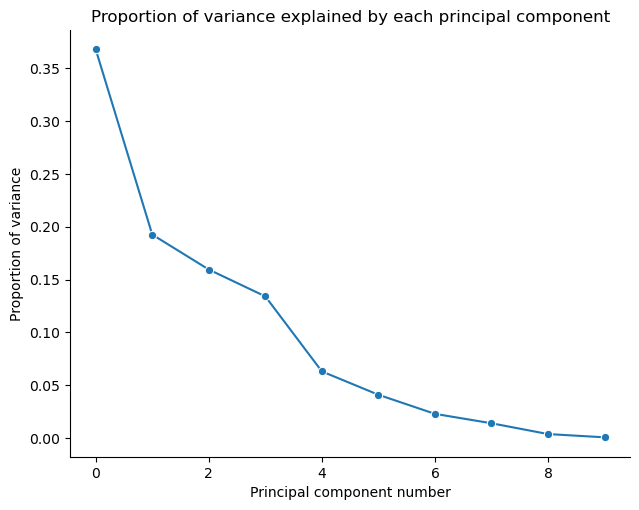

In [7]:
# Create a Pandas DataFrame from the variance explained array
explained_variance_array_df = pd.DataFrame(explained_variance_array, columns=["Variance explained"])

(
  # Create a line chart with sns.relplot
  sns.relplot(
      kind = 'line',
      data = explained_variance_array_df,
      x = explained_variance_array_df.index,
      y = "Variance explained",
      marker = 'o',
      aspect = 1.3)
  # Set the title of the plot
  .set(title = "Proportion of variance explained by each principal component")
  # Set the axis labels
  .set_axis_labels("Principal component number", "Proportion of variance")
);

Just like the elbow method used to determine the optimal number of clusters for k-means clustering, we are looking for a point where the decrease in variance levels off. This point, known as the elbow point, marks the point at which the explained variance starts to reduce significantly.

In [8]:
# Set the variable elbow to where you believe the elbow is
elbow = 6

Let's make a DataFrame containing these principle components

In [9]:
# Create a PCA object with {elbow} principal components
# We add 1 as the principal components start at 0 and not 1
pca_elbow = PCA(n_components = elbow + 1)

# Fit the PCA object to the scaled features dataframe and transform it
pca_elbow_df = pca_elbow.fit_transform(scaled_features_df)

# The dataframe now contains the principal components of the scaled features dataframe
pca_elbow_df

pca0      pca1      pca2      pca3      pca4      pca5  \
student                                                                 
Alexandra -0.791544  0.013019  1.141658 -0.035853 -0.155952  0.101268   
Andrea     0.049550 -0.820885  0.353933 -0.542393  0.377203 -0.130496   
Daniel    -0.686774 -0.839755 -0.352403  0.423750 -0.061842  0.240311   
Josef     -0.627075  0.944560 -0.037933  0.257967  0.107956 -0.192858   
Kaj       -1.005751  0.087092 -0.307003 -0.411140 -0.324927 -0.174651   
Katherine -0.369758  0.440530 -0.342519 -0.127094  0.528051  0.459197   
Leslie     0.340745  0.239646  0.294414  0.069526 -0.068146 -0.179807   
Merry      0.742523 -0.417591 -0.151973 -0.136223 -0.010156 -0.100662   
Perry      1.035180  0.144931  0.214252  0.283412 -0.436968  0.365140   
Sari       0.285584  0.167570 -0.619001 -0.658954 -0.319135  0.001200   
Sim        1.063857  0.317225  0.132092 -0.004463  0.308149 -0.119642   
Tim       -0.036538 -0.276342 -0.325517  0.881464  0.055766 -0.269000   

               pca6  
student              
Alexandra  0.067188  
Andrea     0.073656  
Daniel    -0.319581  
Josef     -0.199884  
Kaj        0.019193  
Katherine  0.173156  
Leslie     0.015188  
Merry     -0.080915  
Perry      0.057370  
Sari       0.085229  
Sim       -0.215182  
Tim        0.324581

#### 3.1.2.&nbsp; Cumulative explained variance
Cumulative explained variance (CEV) is calculated by summing the explained variance of each principal component. The CEV plot shows how much variance is explained by each principal component, as well as the cumulative variance explained by all principal components up to that point.

In [10]:
cumulative_sum_of_variance = np.cumsum(explained_variance_array)

cumulative_sum_of_variance

array([0.36750845, 0.55999854, 0.71946406, 0.85355318, 0.91673895,
       0.95785541, 0.98093135, 0.99511995, 0.99910157, 1.        ])

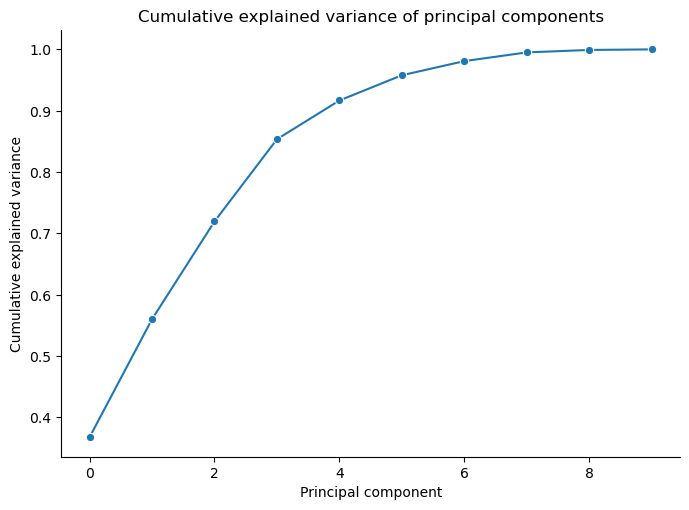

In [11]:
(
  # Create a cumulative explained variance plot
  sns.relplot(
      kind = "line",  # Create a line plot
      x = range(len(explained_variance_array)),  # Set the x-axis to be the principal component index
      y = cumulative_sum_of_variance,  # Set the y-axis to be the cumulative explained variance
      marker = "o",  # Use a circle marker for the data points
      aspect = 1.4,  # Set the aspect ratio of the plot to be 1.4
  )
  # Set the title of the plot
  .set(title = "Cumulative explained variance of principal components")
  # Set the axis labels
  .set_axis_labels("Principal component", "Cumulative explained variance")
);

We can also look for an elbow in the cumulative variance plot to determine how many principal components to retain. However, instead of doing that, we will set a cumulative variance threshold in the PCA constructor. This threshold tells scikit-learn how many principal components to retain. For example, 0.95 tells scikit-learn that we want to retain as many principle components as contain 95% or more of the variance.

In [12]:
# Create a PCA object
pca_variance = PCA(n_components = 0.95)

Let's visualise this threshold

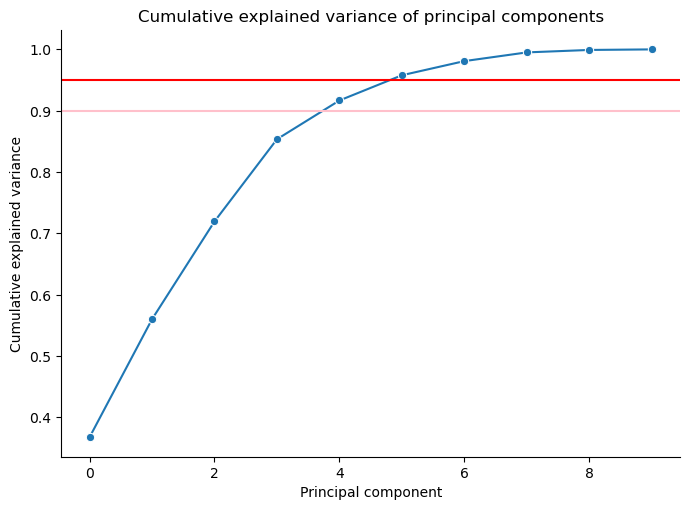

In [13]:
(
  # Create a cumulative explained variance plot
  sns.relplot(
      kind = "line",  # Create a line plot
      x = range(len(explained_variance_array)),  # Set the x-axis to be the principal component index
      y = cumulative_sum_of_variance,  # Set the y-axis to be the cumulative explained variance
      marker = "o",  # Use a circle marker for the data points
      aspect = 1.4,  # Set the aspect ratio of the plot to be 1.4
  )
  # Set the title of the plot
  .set(title="Cumulative explained variance of principal components")
  # Set the axis labels
  .set_axis_labels("Principal component", "Cumulative explained variance")
);

# Add a horizontal red line at 0.95 on the y axis
plt.axhline(y = 0.95, color = 'red');
plt.axhline(y = 0.90, color = 'pink');

Let's apply this to our scaled data

In [14]:
# Fit the PCA object to the scaled features dataframe and transform it
pca_variance_df = pca_variance.fit_transform(scaled_features_df)

# The dataframe now contains the principal components of the scaled features dataframe
pca_variance_df

pca0      pca1      pca2      pca3      pca4      pca5
student                                                              
Alexandra -0.791544  0.013019  1.141658 -0.035853 -0.155952  0.101268
Andrea     0.049550 -0.820885  0.353933 -0.542393  0.377203 -0.130496
Daniel    -0.686774 -0.839755 -0.352403  0.423750 -0.061842  0.240311
Josef     -0.627075  0.944560 -0.037933  0.257967  0.107956 -0.192858
Kaj       -1.005751  0.087092 -0.307003 -0.411140 -0.324927 -0.174651
Katherine -0.369758  0.440530 -0.342519 -0.127094  0.528051  0.459197
Leslie     0.340745  0.239646  0.294414  0.069526 -0.068146 -0.179807
Merry      0.742523 -0.417591 -0.151973 -0.136223 -0.010156 -0.100662
Perry      1.035180  0.144931  0.214252  0.283412 -0.436968  0.365140
Sari       0.285584  0.167570 -0.619001 -0.658954 -0.319135  0.001200
Sim        1.063857  0.317225  0.132092 -0.004463  0.308149 -0.119642
Tim       -0.036538 -0.276342 -0.325517  0.881464  0.055766 -0.269000

### 3.2.&nbsp; Using PCA on a bigger dataset
Let's look at how useful PCA can be as your datasets get bigger

Sklearn `make_blobs` creates artificial datasets with distinct clusters. Specifically, it creates a specified number of clusters, each with a defined center and standard deviation, and generates a set of random data points around these cluster centers.

In [15]:
X, _ = make_blobs(n_samples = 1000,
                  n_features = 80,
                  centers = 30,
                  random_state = 123)

blobs_df = pd.DataFrame(X)

blobs_df

0         1         2         3          4         5         6   \
0   -1.701211 -6.399239 -7.729052  2.265238   8.432041  9.277738 -3.215520   
1    6.278723 -1.685660 -8.218419  1.232155   4.975136  3.283750 -7.377526   
2    0.362480  6.060881  8.326247 -8.100459   3.719719  5.852855 -3.622466   
3   -7.898993  7.340964  8.437767  1.638283 -10.638737 -5.494111  4.355004   
4   -1.966892  4.560141  0.305921 -9.505989   2.049690  4.833094 -3.366090   
..        ...       ...       ...       ...        ...       ...       ...   
995  5.037868 -1.052171 -1.696614 -3.589264   1.354960 -7.171995 -6.449717   
996  4.966277 -1.962102 -0.405020 -5.171068   1.487542 -8.193387 -5.577824   
997  3.113358 -6.218700 -7.158985  3.228768   3.312216 -0.032758  8.548647   
998 -3.098527  0.416230 -9.574874  6.547465   8.146674  0.221676 -4.811377   
999 -3.294759  5.145283 -0.279882 -2.010429   8.798437  7.043229 -2.221620   

            7         8          9   ...        70        71        72  \
0     8.544695  6.099043   0.014891  ...  9.396956  5.661922  2.934566   
1    -2.714595 -3.882671  -1.899557  ...  5.466632  2.652671 -9.222847   
2    10.132258 -4.990926 -10.128942  ... -4.794613 -5.285732  2.524211   
3     6.773989 -1.184502  -2.607903  ...  0.693676  2.874440  4.808158   
4     6.964881  6.073835  -0.826616  ... -6.015234 -5.711455 -4.577501   
..         ...       ...        ...  ...       ...       ...       ...   
995   7.796660 -7.974470   9.057194  ...  0.628226  8.164277  0.225216   
996   6.705522 -9.944412   7.558356  ...  3.103869  9.523761 -1.618870   
997   4.993490  0.905350  -1.923980  ... -7.073941  8.812679  3.583802   
998   8.627207 -2.746769   2.801459  ... -7.886887  2.117376 -0.069422   
999  -9.152729 -5.335164  -1.799622  ... -6.362808  4.169783 -4.143049   

           73         74         75        76        77         78         79  
0    3.170368  -7.399278  -0.832894 -0.999056 -8.342735 -10.092994 -10.179048  
1    9.538737  -7.463871   2.315972 -2.579873  8.930986   9.458209  -4.704239  
2   -0.303708  -3.738831  -8.620748  0.995726 -3.263961  -1.606649  -2.287265  
3   -6.888949   7.978908   1.088713 -8.015163  3.873678  -6.091533  -9.308514  
4    6.368909   7.408595 -10.217053 -3.956262  9.250847   0.802116   3.455974  
..        ...        ...        ...       ...       ...        ...        ...  
995  5.006440  -8.500344   8.669795  9.208054 -4.265727   5.286935   4.811373  
996  5.583400 -11.195325   7.614480  8.127628 -4.248268   4.068702   7.036022  
997  5.988114  -8.865571  -0.392879  1.778686 -6.369937  -7.159916   2.437978  
998 -7.265878  -9.514596  -1.640425  2.925496 -2.944405  -2.298123   6.162888  
999 -1.842483   2.437826  -9.322021  2.654815  7.884497   3.524140  -0.162634  

[1000 rows x 80 columns]

Scale our created data

In [16]:
# Initialise the transformer (optionally, set parameters)
my_min_max = MinMaxScaler()

# Use the transformer to transform the data
scaled_blobs_df = my_min_max.fit_transform(blobs_df)

Perform PCA on our scaled data

In [17]:
# Initialise the PCA object
pca = PCA()

# Fit the PCA object to the data
pca.fit(scaled_blobs_df)

PCA()

Extract the explained variance for each Principal Component

In [18]:
explained_blobs_variance_array = pca.explained_variance_ratio_

Plot the cumulative sum of the extracted variances

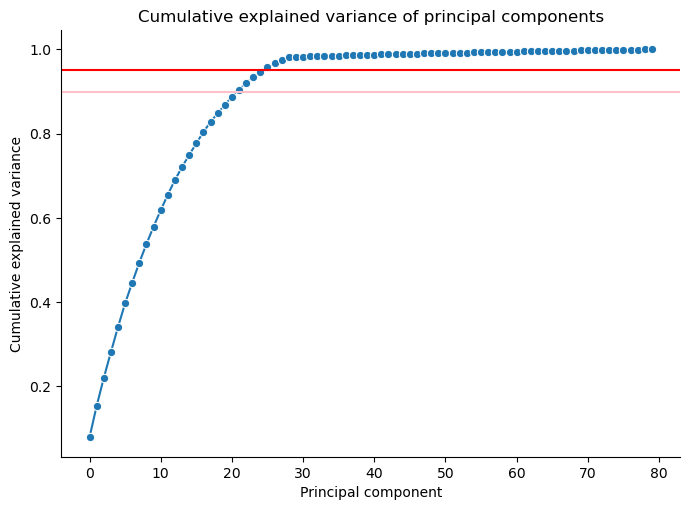

In [19]:
(
  # Create a cumulative explained variance plot
  sns.relplot(
      kind = "line",  # Create a line plot
      x = range(len(explained_blobs_variance_array)),  # Set the x-axis to be the principal component index
      y = np.cumsum(explained_blobs_variance_array),  # Set the y-axis to be the cumulative explained variance
      marker = "o",  # Use a circle marker for the data points
      aspect = 1.4,  # Set the aspect ratio of the plot to be 1.4
  )
  # Set the title of the plot
  .set(title = "Cumulative explained variance of principal components")
  # Set the axis labels
  .set_axis_labels("Principal component", "Cumulative explained variance")
);

# Add a horizontal red line at 0.95 on the y axis
plt.axhline(y = 0.95, color = 'red');
plt.axhline(y = 0.90, color = 'pink');

Find out how many components make up 95% of the variance

In [20]:
# Calculate the cumulative sum
cumulative_sum = np.cumsum(explained_blobs_variance_array)

# Find the index where the cumulative sum reaches 0.95
index = np.searchsorted(cumulative_sum, 0.95)

# Print the number of components required to reach 0.95 variance
print(index + 1)

26


In this example, we were able to successfully reduce an 80-dimensional dataset to a more manageable 26-dimensional representation. This significant reduction in dimensionality not only helps to minimize noise but also substantially improves training times.

## 4.&nbsp; Challenge: apply this to the spotify dataset 😃
Use PCA to reduce noise and the dimensionality of the Spotify dataset before clustering the songs. This will help to identify the most important features of the songs, and it will also make the clustering process more efficient.

Once you have clustered the songs using the selected principal components, you can analyse the clusters to identify groups of similar songs. For example, you could look for clusters of songs with similar genres, tempos, or moods.

## 4.1 Data

Libraries

In [179]:
import ctypes # beeper
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import plotly
import numpy as np
import plotly.graph_objects as go
import random
import seaborn as sns

from sklearn import set_config
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, pairwise_distances, silhouette_score
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, PowerTransformer, QuantileTransformer, RobustScaler, StandardScaler

from ydata_profiling import ProfileReport

set_config(transform_output="pandas")

Data

In [180]:
file_id = "12RcGLcvv-UjJjb3wL_yL76EiPT2JvB3k" # milos
url = f'https://drive.google.com/uc?export=download&id={file_id}'
songs5000_df = pd.read_csv(url, index_col='id                     ')
songs5000_df.columns = songs5000_df.columns.str.strip()
songs5000_df = songs5000_df[~songs5000_df.index.duplicated(keep='first')]
songs5000_names_df = songs5000_df[['name', 'artist', 'html']]
to_drop = ['Unnamed: 0', 'name', 'artist', 'html', 'type'] # 'duration_ms'?? # Sudeep took out also: key, mode, time_signature
songs5000_df = songs5000_df.drop(columns=to_drop)
songs5000_df = songs5000_df.drop_duplicates(keep='first')

Preprocessing

In [181]:
preprocessing_dict = {
    'danceability': [
        {'method': 'none', 'parameters': {}} # the parameters key can be skipped if empty
    ]
    , 'energy': [
        {'method': 'quantile'}
    ]
    , 'key': [
        {'method': 'minmax'}
    ]
    , 'loudness': [
        {'method': 'robust'}
        , {'method': 'power'}
        , {'method': 'minmax', 'parameters': {'feature_range': (0, 1.3)}}
    ]
    , 'mode': [
        {'method': 'none'}
    ]
    , 'speechiness': [
        {'method': 'robust'}
        , {'method': 'power'}
        , {'method': 'minmax', 'parameters': {'feature_range': (-0.4, 1)}}
    ]
    , 'acousticness': [
        {'method': 'quantile'}
    ]
    , 'instrumentalness': [
        {'method': 'power'}
        , {'method': 'minmax'}
        , {'method': 'quantile'}
    ]
    , 'liveness': [
        {'method': 'power'}
        , {'method': 'minmax', 'parameters': {'feature_range': (-0.15, 1)}}
    ]
    , 'valence': [
        {'method': 'power'}
        , {'method': 'minmax'}
    ]
    , 'tempo': [
        {'method': 'standard'}
        , {'method': 'minmax', 'parameters': {'feature_range': (-0.3, 1)}}
    ]
    , 'duration_ms': [
        {'method': 'function', 'parameters': {'func': np.log1p, 'validate': True}}
        , {'method': 'minmax', 'parameters': {'feature_range': (-0.4, 1.5)}}
    ]
    , 'time_signature': [
        {'method': 'power'}
        , {'method': 'minmax'}
    ]
}
number_of_components = len(preprocessing_dict)
preprocessing_df = pd.DataFrame(
    [
        (key, method.get('method'), method.get('parameters', {}))
        for key, methods in preprocessing_dict.items()
        if isinstance(methods, list)
        for method in methods
        if isinstance(method, dict)
    ],
    columns=["feature", "method", "parameters"]
)
# preprocessing_df

In [182]:
preprocessing_alt_dict = {
    'danceability': [
        {'method': 'none', 'parameters': {}} # the parameters key can be skipped if empty
    ]
    , 'energy': [
        {'method': 'quantile'}
    ]
    , 'key': [
        {'method': 'minmax'}
    ]
    , 'loudness': [
        {'method': 'robust'}
        , {'method': 'power'}
        , {'method': 'minmax'} # , 'parameters': {'feature_range': (0, 1.25)}}
    ]
    , 'mode': [
        {'method': 'none'}
    ]
    , 'speechiness': [
        {'method': 'robust'}
        , {'method': 'power'}
        , {'method': 'minmax'} # , 'parameters': {'feature_range': (-0.4, 1)}}
    ]
    , 'acousticness': [
        {'method': 'quantile'}
    ]
    , 'instrumentalness': [
        {'method': 'power'}
        , {'method': 'minmax'}
        , {'method': 'quantile'}
    ]
    , 'liveness': [
        {'method': 'power'}
        , {'method': 'minmax'} # , 'parameters': {'feature_range': (-0.15, 1)}}
    ]
    , 'valence': [
        {'method': 'power'}
        , {'method': 'minmax'}
    ]
    , 'tempo': [
        {'method': 'standard'}
        , {'method': 'minmax'} # , 'parameters': {'feature_range': (-0.3, 1)}}
    ]
    , 'duration_ms': [
        {'method': 'function', 'parameters': {'func': np.log1p, 'validate': True}}
        , {'method': 'minmax'} # , 'parameters': {'feature_range': (-0.4, 1.5)}}
    ]
    , 'time_signature': [
        {'method': 'power'}
        , {'method': 'minmax'} # , 'parameters': {'feature_range': (0, 1)}}
    ]
}
number_of_components_alt = len(preprocessing_alt_dict)
preprocessing_alt_df = pd.DataFrame(
    [
        (key, method.get('method'), method.get('parameters', {}))
        for key, methods in preprocessing_alt_dict.items()
        if isinstance(methods, list)
        for method in methods
        if isinstance(method, dict)
    ],
    columns=["feature", "method", "parameters"]
)
# preprocessing_df

In [183]:
songs5000_preprocessed_df = songs5000_df.copy()

for i, row in preprocessing_df.iterrows():
    feature = row['feature']
    method = row['method']
    parameters = row['parameters']

    if method == 'function':
        scaler = FunctionTransformer(**parameters).set_output(transform="default")
        songs5000_preprocessed_df[feature] = scaler.fit_transform(songs5000_preprocessed_df[[feature]])
    elif method == 'minmax':
        scaler = MinMaxScaler(**parameters).set_output(transform="pandas")
        songs5000_preprocessed_df[feature] = scaler.fit_transform(songs5000_preprocessed_df[[feature]])
    elif method == 'power':
        transformer = PowerTransformer(**parameters).set_output(transform="pandas")
        songs5000_preprocessed_df[feature] = transformer.fit_transform(songs5000_preprocessed_df[[feature]])
    elif method == 'quantile':
        transformer = QuantileTransformer(**parameters).set_output(transform="pandas")
        songs5000_preprocessed_df[feature] = transformer.fit_transform(songs5000_preprocessed_df[[feature]])
    elif method == 'robust':
        scaler = RobustScaler(**parameters).set_output(transform="pandas")
        songs5000_preprocessed_df[feature] = scaler.fit_transform(songs5000_preprocessed_df[[feature]])
    elif method == 'standard':
        scaler = StandardScaler(**parameters).set_output(transform="pandas")
        songs5000_preprocessed_df[feature] = scaler.fit_transform(songs5000_preprocessed_df[[feature]])

In [184]:
songs5000_preprocessed_alt_df = songs5000_df.copy()

for i, row in preprocessing_alt_df.iterrows():
    feature = row['feature']
    method = row['method']
    parameters = row['parameters']

    if method == 'function':
        scaler = FunctionTransformer(**parameters).set_output(transform="default")
        songs5000_preprocessed_alt_df[feature] = scaler.fit_transform(songs5000_preprocessed_alt_df[[feature]])
    elif method == 'minmax':
        scaler = MinMaxScaler(**parameters).set_output(transform="pandas")
        songs5000_preprocessed_alt_df[feature] = scaler.fit_transform(songs5000_preprocessed_alt_df[[feature]])
    elif method == 'power':
        transformer = PowerTransformer(**parameters).set_output(transform="pandas")
        songs5000_preprocessed_alt_df[feature] = transformer.fit_transform(songs5000_preprocessed_alt_df[[feature]])
    elif method == 'quantile':
        transformer = QuantileTransformer(**parameters).set_output(transform="pandas")
        songs5000_preprocessed_alt_df[feature] = transformer.fit_transform(songs5000_preprocessed_alt_df[[feature]])
    elif method == 'robust':
        scaler = RobustScaler(**parameters).set_output(transform="pandas")
        songs5000_preprocessed_alt_df[feature] = scaler.fit_transform(songs5000_preprocessed_alt_df[[feature]])
    elif method == 'standard':
        scaler = StandardScaler(**parameters).set_output(transform="pandas")
        songs5000_preprocessed_alt_df[feature] = scaler.fit_transform(songs5000_preprocessed_alt_df[[feature]])

Plot

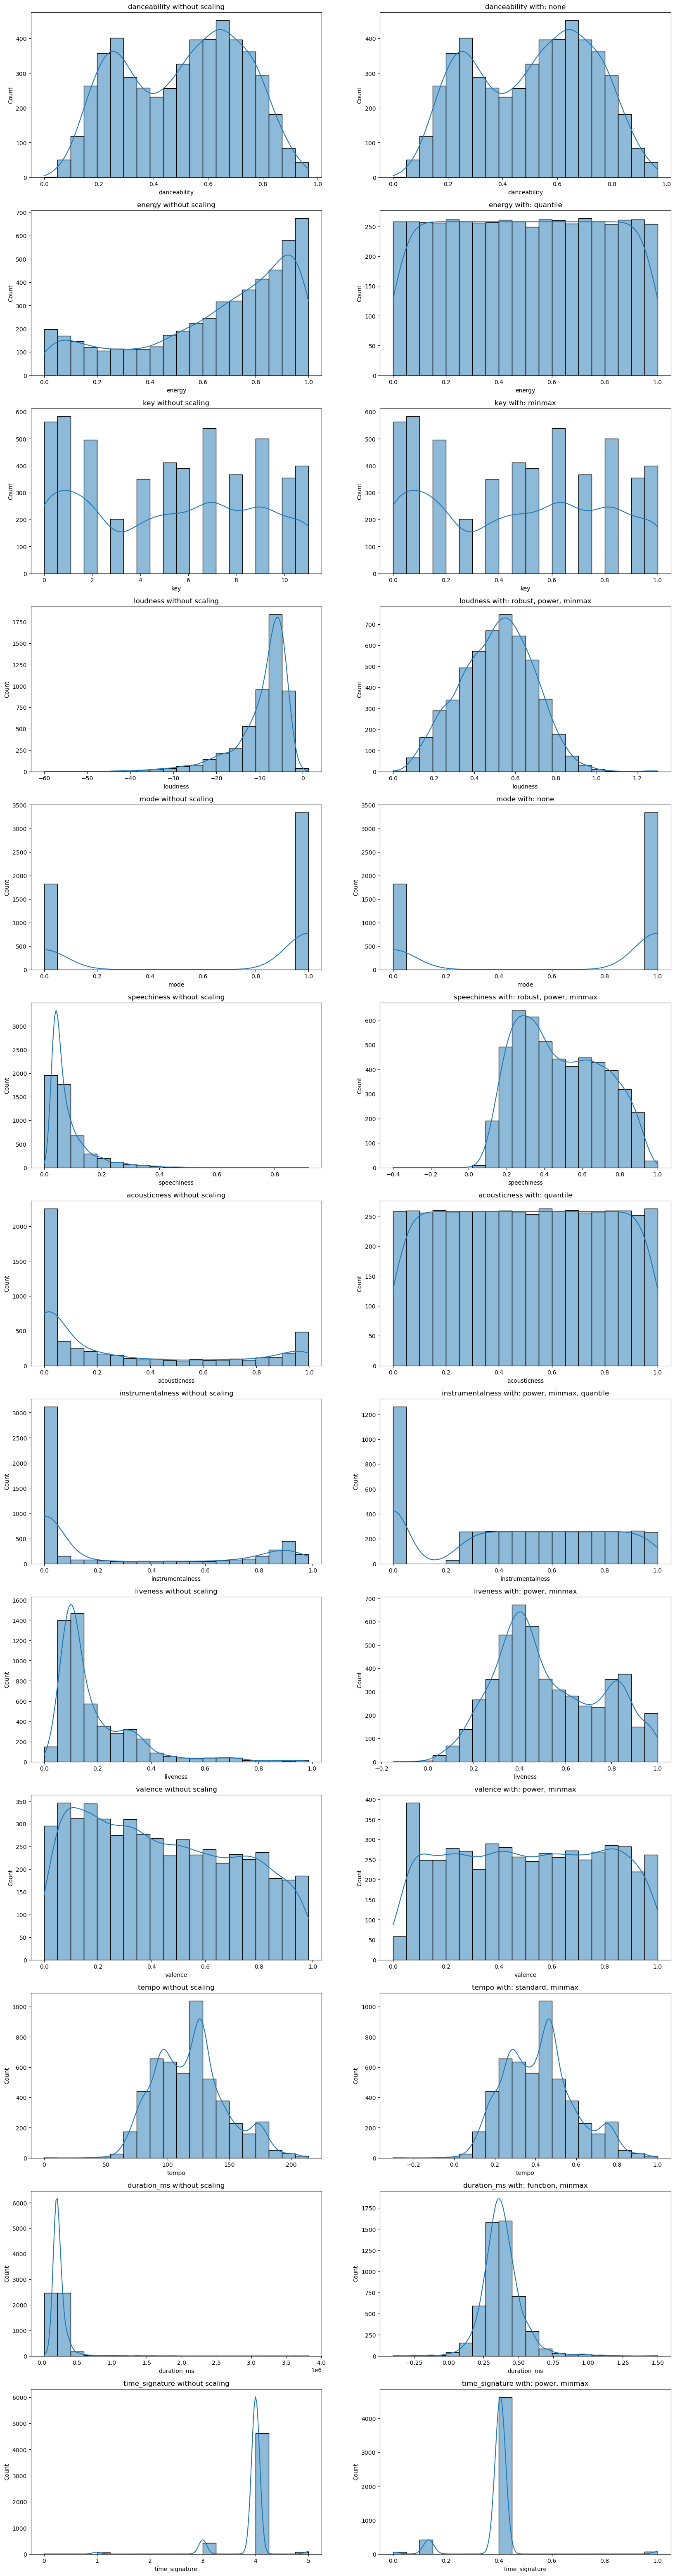

In [185]:
fig, ax = plt.subplots(number_of_components, 2, figsize=(20, 80))

for i in range(ax.shape[0]):
    sns.histplot(data=songs5000_df.iloc[:, i], bins=20, kde=True, ax=ax[i, 0]);
    sns.histplot(data=songs5000_preprocessed_df.iloc[:, i], bins=20, kde=True, ax=ax[i, 1]);

    ax[i, 0].set_title(f'{list(preprocessing_dict.keys())[i]} without scaling')
    ax[i, 1].set_title(f'{list(preprocessing_dict.keys())[i]} with: {''', '''.join([method['method'] for method in preprocessing_dict[list(preprocessing_dict.keys())[i]]])}')
    
plt.show()

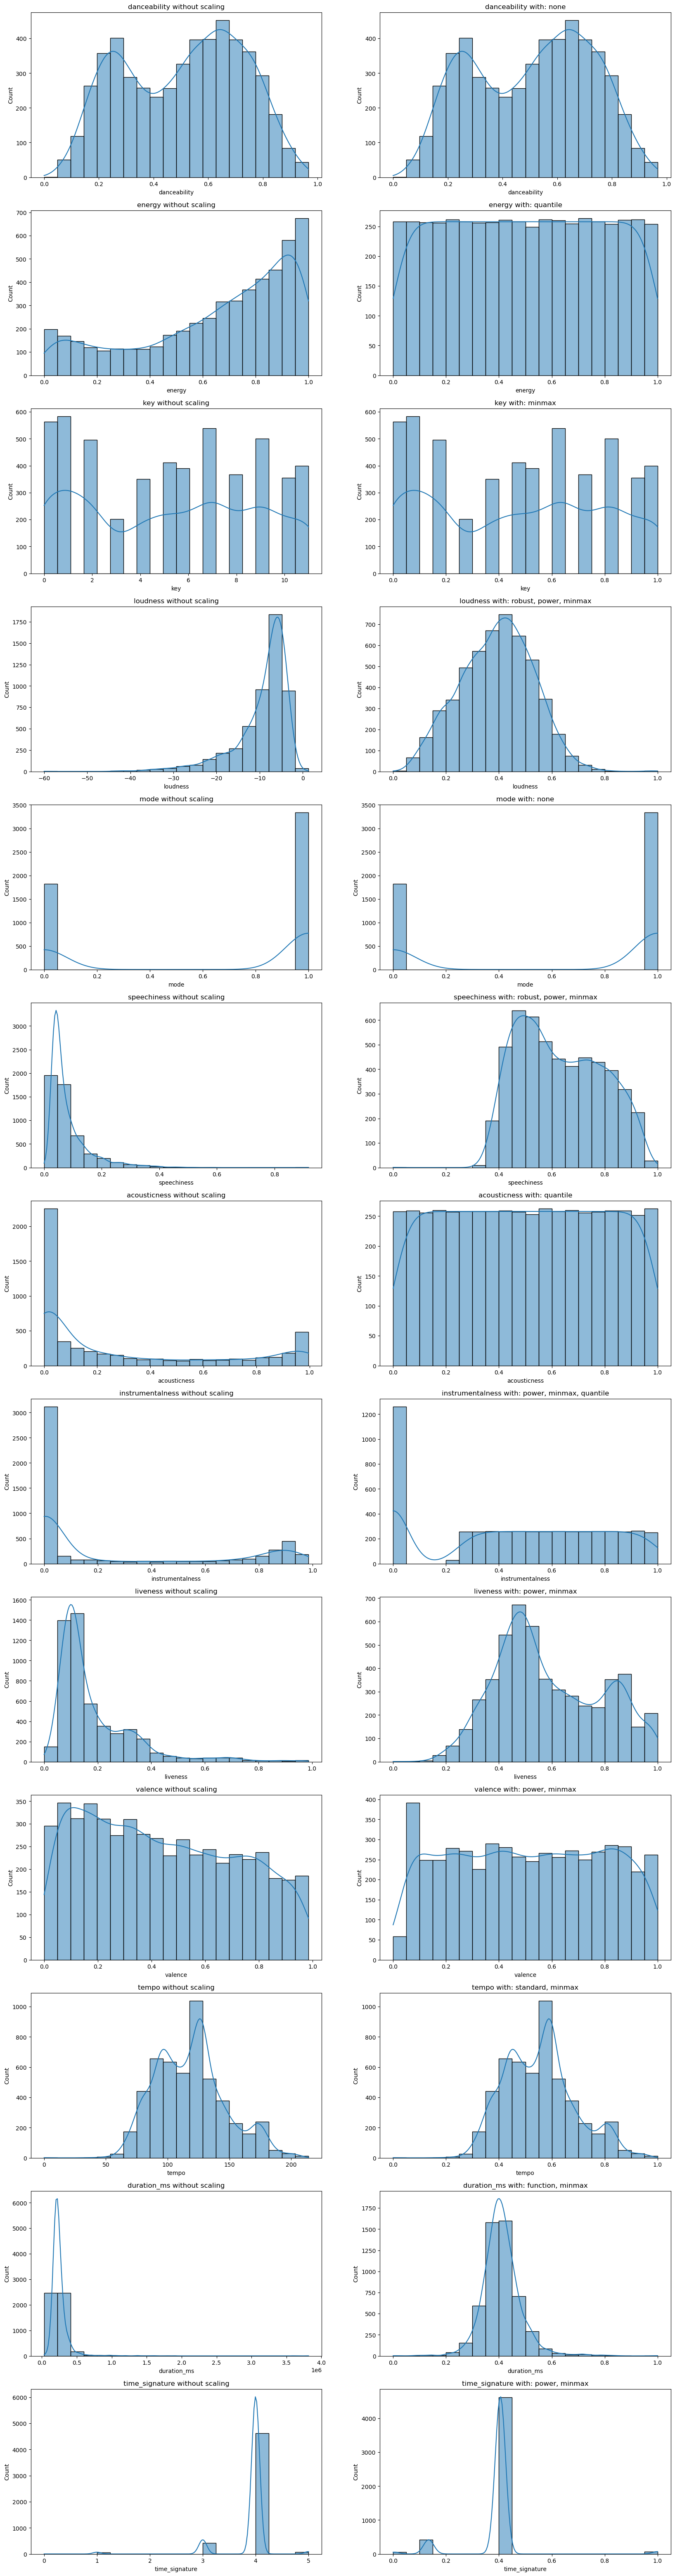

In [186]:
fig, ax = plt.subplots(number_of_components_alt, 2, figsize=(20, 80))

for i in range(ax.shape[0]):
    sns.histplot(data=songs5000_df.iloc[:, i], bins=20, kde=True, ax=ax[i, 0]);
    sns.histplot(data=songs5000_preprocessed_alt_df.iloc[:, i], bins=20, kde=True, ax=ax[i, 1]);

    ax[i, 0].set_title(f'{list(preprocessing_alt_dict.keys())[i]} without scaling')
    ax[i, 1].set_title(f'{list(preprocessing_alt_dict.keys())[i]} with: {''', '''.join([method['method'] for method in preprocessing_alt_dict[list(preprocessing_alt_dict.keys())[i]]])}')
    
plt.show()

## 4.2 PCA

In [187]:
songs5000_pca = PCA()
songs5000_pca_df = songs5000_pca.fit_transform(songs5000_preprocessed_df)
# songs5000_pca_df

In [188]:
songs5000_pca_alt = PCA()
songs5000_pca_alt_df = songs5000_pca_alt.fit_transform(songs5000_preprocessed_alt_df)
# songs5000_pca_alt_df

In [189]:
print('Explained variance by pricipal component:\n', songs5000_pca.explained_variance_ratio_)
print('\nCummulative explained variance by principal component\n', np.cumsum(songs5000_pca.explained_variance_ratio_))

Explained variance by pricipal component:
 [0.25200056 0.20260427 0.18648361 0.10802639 0.05573508 0.04959436
 0.0383559  0.03089902 0.02020239 0.01962281 0.01704278 0.01226501
 0.00716782]

Cummulative explained variance by principal component
 [0.25200056 0.45460483 0.64108844 0.74911483 0.80484992 0.85444428
 0.89280017 0.92369919 0.94390159 0.96352439 0.98056717 0.99283218
 1.        ]


In [190]:
print('Explained variance by pricipal component:\n', songs5000_pca_alt.explained_variance_ratio_)
print('\nCummulative explained variance by principal component\n', np.cumsum(songs5000_pca_alt.explained_variance_ratio_))

Explained variance by pricipal component:
 [0.27402558 0.2159095  0.18662714 0.11766282 0.05554472 0.04422139
 0.02408941 0.02137426 0.01799365 0.01779394 0.01336553 0.00586193
 0.00553014]

Cummulative explained variance by principal component
 [0.27402558 0.48993508 0.67656221 0.79422503 0.84976975 0.89399114
 0.91808054 0.93945481 0.95744845 0.9752424  0.98860793 0.99446986
 1.        ]


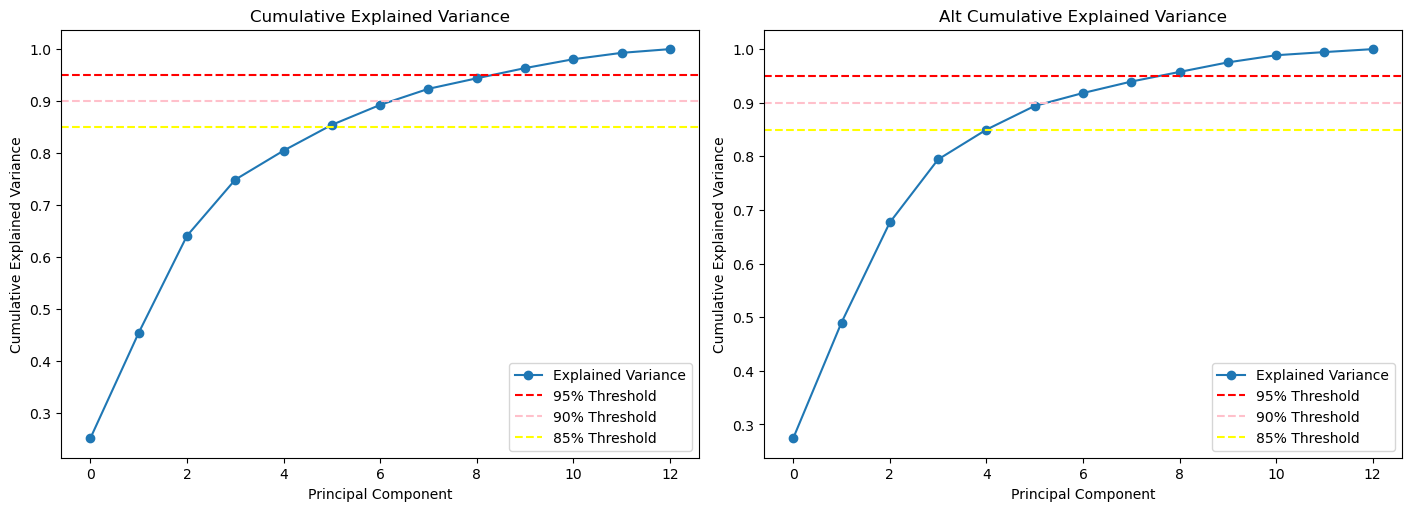

In [78]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)

# First plot: Cumulative explained variance
axes[0].plot(
    range(len(songs5000_pca.explained_variance_ratio_)),
    np.cumsum(songs5000_pca.explained_variance_ratio_),
    marker="o",
    label="Explained Variance",
)
axes[0].axhline(y=0.95, color="red", linestyle="--", label="95% Threshold")
axes[0].axhline(y=0.90, color="pink", linestyle="--", label="90% Threshold")
axes[0].axhline(y=0.85, color="yellow", linestyle="--", label="85% Threshold")
axes[0].set_title("Cumulative Explained Variance")
axes[0].set_xlabel("Principal Component")
axes[0].set_ylabel("Cumulative Explained Variance")
axes[0].legend()

# Second plot: Alt cumulative explained variance
axes[1].plot(
    range(len(songs5000_pca_alt.explained_variance_ratio_)),
    np.cumsum(songs5000_pca_alt.explained_variance_ratio_),
    marker="o",
    label="Explained Variance",
)
axes[1].axhline(y=0.95, color="red", linestyle="--", label="95% Threshold")
axes[1].axhline(y=0.90, color="pink", linestyle="--", label="90% Threshold")
axes[1].axhline(y=0.85, color="yellow", linestyle="--", label="85% Threshold")
axes[1].set_title("Alt Cumulative Explained Variance")
axes[1].set_xlabel("Principal Component")
axes[1].set_ylabel("Cumulative Explained Variance")
axes[1].legend()

# Show the combined plots
plt.show()


10 clusters explain 95% of the variance

7 clusters explain almost 90% of the variance - it's our number

6 clusters explain 85% of the variance

Alternatively, when some of the features are not minmaxed to 0-1, less components are explaining the same variance. This is possibly cause by the fact, that some features (scaled to 0-1) are overweight by the the others ones (scaled to e.g. -0.1 to 1.2), because they are narrower. Example, standard distribution in range 0-1 will have shorter distances, than uniform distribution in the same range, because the most of the values in standard distributand will be in narrower range than 0-1. Therefore minmax in range bigger than 0-1 might be better (the most of the values will be in range 0-1).

## 4.3 Number of clusters

For-loop for calinski-harabasz scores, davies-boulin scores, inertia points and silhouette scores

### 4.3.1 Seven components

In [34]:
number_of_components = 7
songs5000_processed_df = songs5000_pca_df.iloc[:, :number_of_components].copy()

In [35]:
# For loop with a few iterations per each "k"
# Around 0.5 seconds per 1 "k" and per 1 iteration
# A run takes (max_k - min_k) * iterations_per_seed * 0.75 / 60 minutes

# Parameters
seed = 123
min_k = 20
max_k = 130
iterations_per_seed = 50
ch_scores = []
db_scores = []
inertia_list = []
sil_scores = []

# Generate x random seeds
random.seed(seed)
random_seeds = [random.randint(0, 10000) for _ in range(iterations_per_seed)]

# Iterations
for k in range(min_k, max_k):
    ch_score_in_iteration = []
    db_score_in_iteration = []
    inertia_in_iteration = []
    sil_score_in_iteration = []
    
    for rnd_seed in random_seeds:
        k_means = KMeans(n_clusters=k, n_init="auto", random_state=rnd_seed)
        k_means.fit(songs5000_processed_df)
        
        # Calculate Calinski-Harabasz score, Davies-Bouldin score, inertia and silhouette score
        labels = k_means.labels_
        
        ch_score = calinski_harabasz_score(songs5000_processed_df, labels)
        ch_score_in_iteration.append(ch_score)
        
        db_score = davies_bouldin_score(songs5000_processed_df, labels)
        db_score_in_iteration.append(db_score)
        
        inertia_in_iteration.append(k_means.inertia_)
        
        sil_score = silhouette_score(songs5000_processed_df, labels)
        sil_score_in_iteration.append(sil_score)
    
    # Append averages to the final lists
    ch_scores.append(pd.Series(ch_score_in_iteration).mean())
    db_scores.append(pd.Series(db_score_in_iteration).mean())
    inertia_list.append(pd.Series(inertia_in_iteration).mean())
    sil_scores.append(pd.Series(sil_score_in_iteration).mean())

_ = ctypes.windll.kernel32.Beep(1000, 2000)

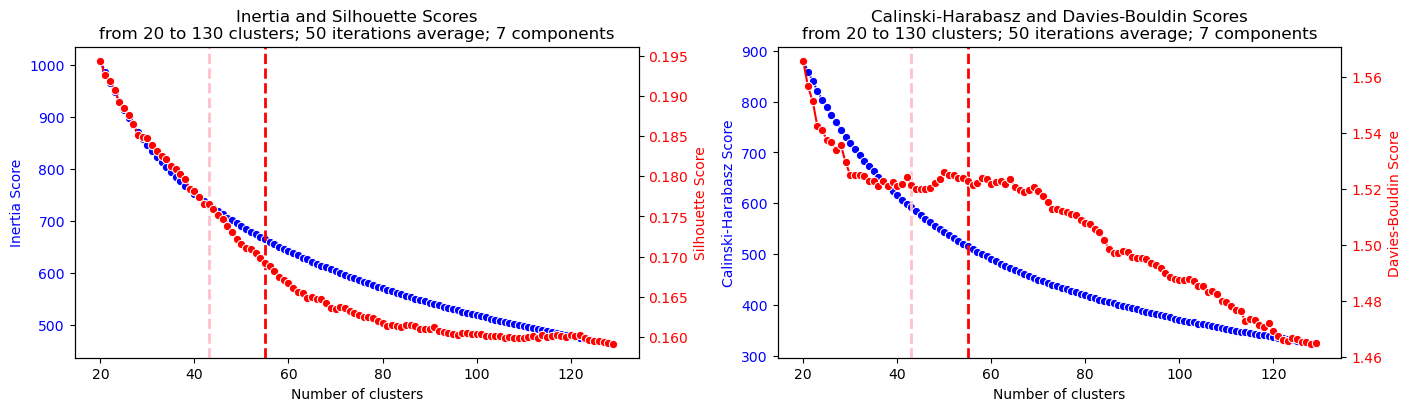

In [81]:
# Assuming inertia_list, sil_scores, ch_scores, db_scores, min_k, and max_k are defined

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 4), constrained_layout=True)

# First subplot: Inertia and Silhouette Scores
ax1 = axes[0]
sns.lineplot(x=range(min_k, max_k), y=inertia_list, marker='o', ax=ax1, label="Inertia Score", color='b', legend=False)
ax1.set_xlabel("Number of clusters")
ax1.set_ylabel("Inertia Score", color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax1_2 = ax1.twinx()
sns.lineplot(x=range(min_k, max_k), y=sil_scores, marker='o', ax=ax1_2, label="Silhouette Score", color='r', legend=False)
ax1_2.set_ylabel("Silhouette Score", color='r')
ax1_2.tick_params(axis='y', labelcolor='r')

ax1.set_title(f"Inertia and Silhouette Scores\nfrom {min_k} to {max_k} clusters; {iterations_per_seed} iterations average; {number_of_components} components")
ax1.axvline(x=43, color='pink', linestyle='--', linewidth=2)
ax1.axvline(x=55, color='red', linestyle='--', linewidth=2)

# Second subplot: Calinski-Harabasz and Davies-Bouldin Scores
ax2 = axes[1]
sns.lineplot(x=range(min_k, max_k), y=ch_scores, marker='o', ax=ax2, label="Calinski-Harabasz Score", color='b', legend=False)
ax2.set_xlabel("Number of clusters")
ax2.set_ylabel("Calinski-Harabasz Score", color='b')
ax2.tick_params(axis='y', labelcolor='b')

ax2_2 = ax2.twinx()
sns.lineplot(x=range(min_k, max_k), y=db_scores, marker='o', ax=ax2_2, label="Davies-Bouldin Score", color='r', legend=False)
ax2_2.set_ylabel("Davies-Bouldin Score", color='r')
ax2_2.tick_params(axis='y', labelcolor='r')

ax2.set_title(f"Calinski-Harabasz and Davies-Bouldin Scores\nfrom {min_k} to {max_k} clusters; {iterations_per_seed} iterations average; {number_of_components} components")
ax2.axvline(x=43, color='pink', linestyle='--', linewidth=2)
ax2.axvline(x=55, color='red', linestyle='--', linewidth=2)

# Add legends to the figure
# fig.legend(loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=2)

# Show the combined plots
plt.show()

### 4.3.2 Seven compoments (alternative)

In [37]:
number_of_components = 7
songs5000_processed_alt_df = songs5000_pca_alt_df.iloc[:, :number_of_components].copy()

In [38]:
# For loop with a few iterations per each "k"
# Around 0.5 seconds per 1 "k" and per 1 iteration, around 5000 rows, 4 scores
# A run takes (max_k - min_k) * iterations_per_seed * 0.75 / 60 minutes

# Parameters
seed = 123
min_k = 20
max_k = 130
iterations_per_seed = 50
ch_scores_alt = []
db_scores_alt = []
inertia_list_alt = []
sil_scores_alt = []

# Generate x random seeds
random.seed(seed)
random_seeds = [random.randint(0, 10000) for _ in range(iterations_per_seed)]

# Iterations
for k in range(min_k, max_k):
    ch_score_in_iteration = []
    db_score_in_iteration = []
    inertia_in_iteration = []
    sil_score_in_iteration = []
    
    for rnd_seed in random_seeds:
        k_means = KMeans(n_clusters=k, n_init="auto", random_state=rnd_seed)
        k_means.fit(songs5000_processed_df)
        
        # Calculate Calinski-Harabasz score, Davies-Bouldin score, inertia and silhouette score
        labels = k_means.labels_
        
        ch_score = calinski_harabasz_score(songs5000_processed_alt_df, labels)
        ch_score_in_iteration.append(ch_score)
        
        db_score = davies_bouldin_score(songs5000_processed_alt_df, labels)
        db_score_in_iteration.append(db_score)
        
        inertia_in_iteration.append(k_means.inertia_)
        
        sil_score = silhouette_score(songs5000_processed_alt_df, labels)
        sil_score_in_iteration.append(sil_score)
    
    # Append averages to the final lists
    ch_scores_alt.append(pd.Series(ch_score_in_iteration).mean())
    db_scores_alt.append(pd.Series(db_score_in_iteration).mean())
    inertia_list_alt.append(pd.Series(inertia_in_iteration).mean())
    sil_scores_alt.append(pd.Series(sil_score_in_iteration).mean())

_ = ctypes.windll.kernel32.Beep(1000, 2000)

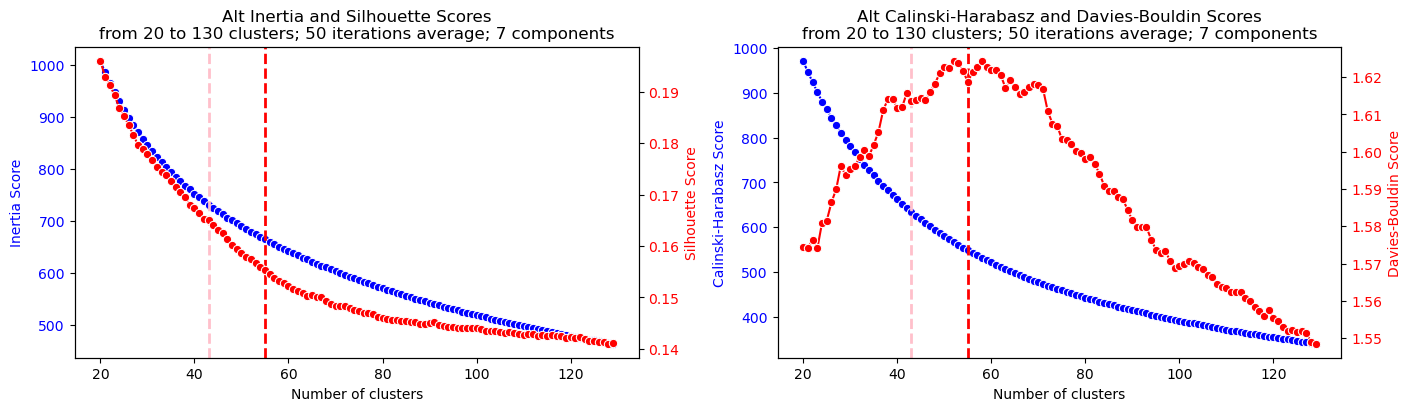

In [84]:
# Alt Assuming inertia_list, sil_scores, ch_scores, db_scores, min_k, and max_k are defined

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 4), constrained_layout=True)

# First subplot: Inertia and Silhouette Scores
ax1 = axes[0]
sns.lineplot(x=range(min_k, max_k), y=inertia_list_alt, marker='o', ax=ax1, label="Inertia Score", color='b', legend=False)
ax1.set_xlabel("Number of clusters")
ax1.set_ylabel("Inertia Score", color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax1_2 = ax1.twinx()
sns.lineplot(x=range(min_k, max_k), y=sil_scores_alt, marker='o', ax=ax1_2, label="Silhouette Score", color='r', legend=False)
ax1_2.set_ylabel("Silhouette Score", color='r')
ax1_2.tick_params(axis='y', labelcolor='r')

ax1.set_title(f"Alt Inertia and Silhouette Scores\nfrom {min_k} to {max_k} clusters; {iterations_per_seed} iterations average; {number_of_components} components")
ax1.axvline(x=43, color='pink', linestyle='--', linewidth=2)
ax1.axvline(x=55, color='red', linestyle='--', linewidth=2)

# Second subplot: Calinski-Harabasz and Davies-Bouldin Scores
ax2 = axes[1]
sns.lineplot(x=range(min_k, max_k), y=ch_scores_alt, marker='o', ax=ax2, label="Calinski-Harabasz Score", color='b', legend=False)
ax2.set_xlabel("Number of clusters")
ax2.set_ylabel("Calinski-Harabasz Score", color='b')
ax2.tick_params(axis='y', labelcolor='b')

ax2_2 = ax2.twinx()
sns.lineplot(x=range(min_k, max_k), y=db_scores_alt, marker='o', ax=ax2_2, label="Davies-Bouldin Score", color='r', legend=False)
ax2_2.set_ylabel("Davies-Bouldin Score", color='r')
ax2_2.tick_params(axis='y', labelcolor='r')

ax2.set_title(f"Alt Calinski-Harabasz and Davies-Bouldin Scores\nfrom {min_k} to {max_k} clusters; {iterations_per_seed} iterations average; {number_of_components} components")
ax2.axvline(x=43, color='pink', linestyle='--', linewidth=2)
ax2.axvline(x=55, color='red', linestyle='--', linewidth=2)

# Add legends to the figure
# fig.legend(loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=2)

# Show the combined plots
plt.show()

### 4.3.3 Conclusion

For 7 components:

Let's take 55 clusters for 5 principal components. 123 to consider.

In [40]:
number_of_kmeans = 55
number_of_kmeans_alt = 55

## 4.4 Radar chart

In [139]:
kmeans = KMeans(n_clusters = number_of_kmeans, random_state = 123)
kmeans.fit(songs5000_processed_df)
clusters = kmeans.labels_
songs5000_processed_df["cluster"] = clusters
# songs5000_processed_df

In [140]:
songs5000_processed_df.groupby(by="cluster").mean().mean()

pca0    0.054964
pca1   -0.044862
pca2    0.002173
pca3   -0.000876
pca4    0.009596
pca5   -0.008309
pca6   -0.002858
dtype: float64

In [141]:
scatter_objects = []
categories = songs5000_processed_df.drop(columns=['cluster']).columns

# Iterate over the unique clusters and add an object for each cluster to the list
for cluster in sorted(songs5000_processed_df['cluster'].unique()):

  # Find the mean value for each column of the cluster
  cluster_min = [songs5000_processed_df.loc[songs5000_processed_df["cluster"] == cluster, category].min() for category in categories]
  cluster_scatter = go.Scatterpolar(r = cluster_min, theta = categories, fill = 'toself', name = f'Cluster {cluster}')
  scatter_objects.append(cluster_scatter)

# Create the figure (the white area)
fig = go.Figure()
fig.add_traces(scatter_objects)

# Add extras to the plot, such as title
fig.update_layout(
  title_text = 'Radar chart of MIN by cluster',
  height = 600,
  width = 800,
  polar = dict(radialaxis = dict(visible = True, range = [0, 1])),
  showlegend = True
)

fig.show()

In [142]:
scatter_objects = []
categories = songs5000_processed_df.drop(columns=['cluster']).columns

# Iterate over the unique clusters and add an object for each cluster to the list
for cluster in sorted(songs5000_processed_df['cluster'].unique()):

  # Find the mean value for each column of the cluster
  cluster_means = [songs5000_processed_df.loc[songs5000_processed_df["cluster"] == cluster, category].mean() for category in categories]
  cluster_scatter = go.Scatterpolar(r = cluster_means, theta = categories, fill = 'toself', name = f'Cluster {cluster}')
  scatter_objects.append(cluster_scatter)

# Create the figure (the white area)
fig = go.Figure()
fig.add_traces(scatter_objects)

# Add extras to the plot, such as title
fig.update_layout(
  title_text = 'Radar chart of MEAN by cluster',
  height = 600,
  width = 800,
  polar = dict(radialaxis = dict(visible = True, range = [0, 1])),
  showlegend = True
)

fig.show()

In [143]:
scatter_objects = []
categories = songs5000_processed_df.drop(columns=['cluster']).columns

# Iterate over the unique clusters and add an object for each cluster to the list
for cluster in sorted(songs5000_processed_df['cluster'].unique()):

  # Find the mean value for each column of the cluster
  cluster_max = [songs5000_processed_df.loc[songs5000_processed_df["cluster"] == cluster, category].max() for category in categories]
  cluster_scatter = go.Scatterpolar(r = cluster_max, theta = categories, fill = 'toself', name = f'Cluster {cluster}')
  scatter_objects.append(cluster_scatter)

# Create the figure (the white area)
fig = go.Figure()
fig.add_traces(scatter_objects)

# Add extras to the plot, such as title
fig.update_layout(
  title_text = 'Radar chart of MAX by cluster',
  height = 600,
  width = 800,
  polar = dict(radialaxis = dict(visible = True, range = [0, 1])),
  showlegend = True
)

fig.show()

PCA returned principal components with range from 0 to 1 (more or less), so no more scaling and transfomration is needed. But let's check the prinipal components' distributions in the next step.

### 4.4.1 Radar chart (alternative)

In [144]:
kmeans_alt = KMeans(n_clusters = number_of_kmeans_alt, random_state = 123)
kmeans_alt.fit(songs5000_processed_alt_df)
clusters = kmeans_alt.labels_
songs5000_processed_alt_df["cluster"] = clusters
# songs5000_processed_alt_df

In [145]:
songs5000_processed_alt_df.groupby(by="cluster").mean().mean()

pca0    0.039407
pca1   -0.025645
pca2   -0.009686
pca3    0.002647
pca4    0.013460
pca5   -0.015209
pca6    0.003193
dtype: float64

In [146]:
scatter_objects = []
categories = songs5000_processed_alt_df.drop(columns=['cluster']).columns

# Iterate over the unique clusters and add an object for each cluster to the list
for cluster in sorted(songs5000_processed_alt_df['cluster'].unique()):

  # Find the mean value for each column of the cluster
  cluster_means = [songs5000_processed_alt_df.loc[songs5000_processed_alt_df["cluster"] == cluster, category].mean() for category in categories]
  cluster_scatter = go.Scatterpolar(r = cluster_means, theta = categories, fill = 'toself', name = f'Cluster {cluster}')
  scatter_objects.append(cluster_scatter)

# Create the figure (the white area)
fig = go.Figure()
fig.add_traces(scatter_objects)

# Add extras to the plot, such as title
fig.update_layout(
  title_text = 'Alt Radar chart of MEAN by cluster',
  height = 600,
  width = 800,
  polar = dict(radialaxis = dict(visible = True, range = [0, 1])),
  showlegend = True
)

fig.show()

## 4.5 Second preprocessing

In [147]:
preprocessing2_dict = {
    'pca0': [
        {'method': 'minmax', 'parameters': {'feature_range': (-0.6, 0.6)}}
    ],
    'pca1': [
        {'method': 'minmax', 'parameters': {'feature_range': (-0.6, 0.6)}}
    ],
    'pca2': [
        {'method': 'minmax', 'parameters': {'feature_range': (-0.6, 0.6)}}
    ],
    'pca3': [
        {'method': 'none'}
    ],
    'pca4': [
        {'method': 'none'}
    ],
    'pca5': [
        {'method': 'none'}
    ],
    'pca6': [
        {'method': 'none'}
    ]
}
preprocessing2_df = pd.DataFrame(
    [
        (key, method.get('method'), method.get('parameters', {}))
        for key, methods in preprocessing2_dict.items()
        if isinstance(methods, list)
        for method in methods
        if isinstance(method, dict)
    ],
    columns=["feature", "method", "parameters"]
)
preprocessing2_df

feature  method                      parameters
0    pca0  minmax  {'feature_range': (-0.6, 0.6)}
1    pca1  minmax  {'feature_range': (-0.6, 0.6)}
2    pca2  minmax  {'feature_range': (-0.6, 0.6)}
3    pca3    none                              {}
4    pca4    none                              {}
5    pca5    none                              {}
6    pca6    none                              {}

In [148]:
songs5000_preprocessed2_df = songs5000_processed_df.copy()

for i, row in preprocessing2_df.iterrows():
    feature = row['feature']
    method = row['method']
    parameters = row['parameters']

    if method == 'function':
        scaler = FunctionTransformer(**parameters).set_output(transform="default")
        songs5000_preprocessed2_df[feature] = scaler.fit_transform(songs5000_preprocessed2_df[[feature]])
    elif method == 'minmax':
        scaler = MinMaxScaler(**parameters).set_output(transform="pandas")
        songs5000_preprocessed2_df[feature] = scaler.fit_transform(songs5000_preprocessed2_df[[feature]])
    elif method == 'power':
        transformer = PowerTransformer(**parameters).set_output(transform="pandas")
        songs5000_preprocessed2_df[feature] = transformer.fit_transform(songs5000_preprocessed2_df[[feature]])
    elif method == 'quantile':
        transformer = QuantileTransformer(**parameters).set_output(transform="pandas")
        songs5000_preprocessed2_df[feature] = transformer.fit_transform(songs5000_preprocessed2_df[[feature]])
    elif method == 'robust':
        scaler = RobustScaler(**parameters).set_output(transform="pandas")
        songs5000_preprocessed2_df[feature] = scaler.fit_transform(songs5000_preprocessed2_df[[feature]])
    elif method == 'standard':
        scaler = StandardScaler(**parameters).set_output(transform="pandas")
        songs5000_preprocessed2_df[feature] = scaler.fit_transform(songs5000_preprocessed2_df[[feature]])

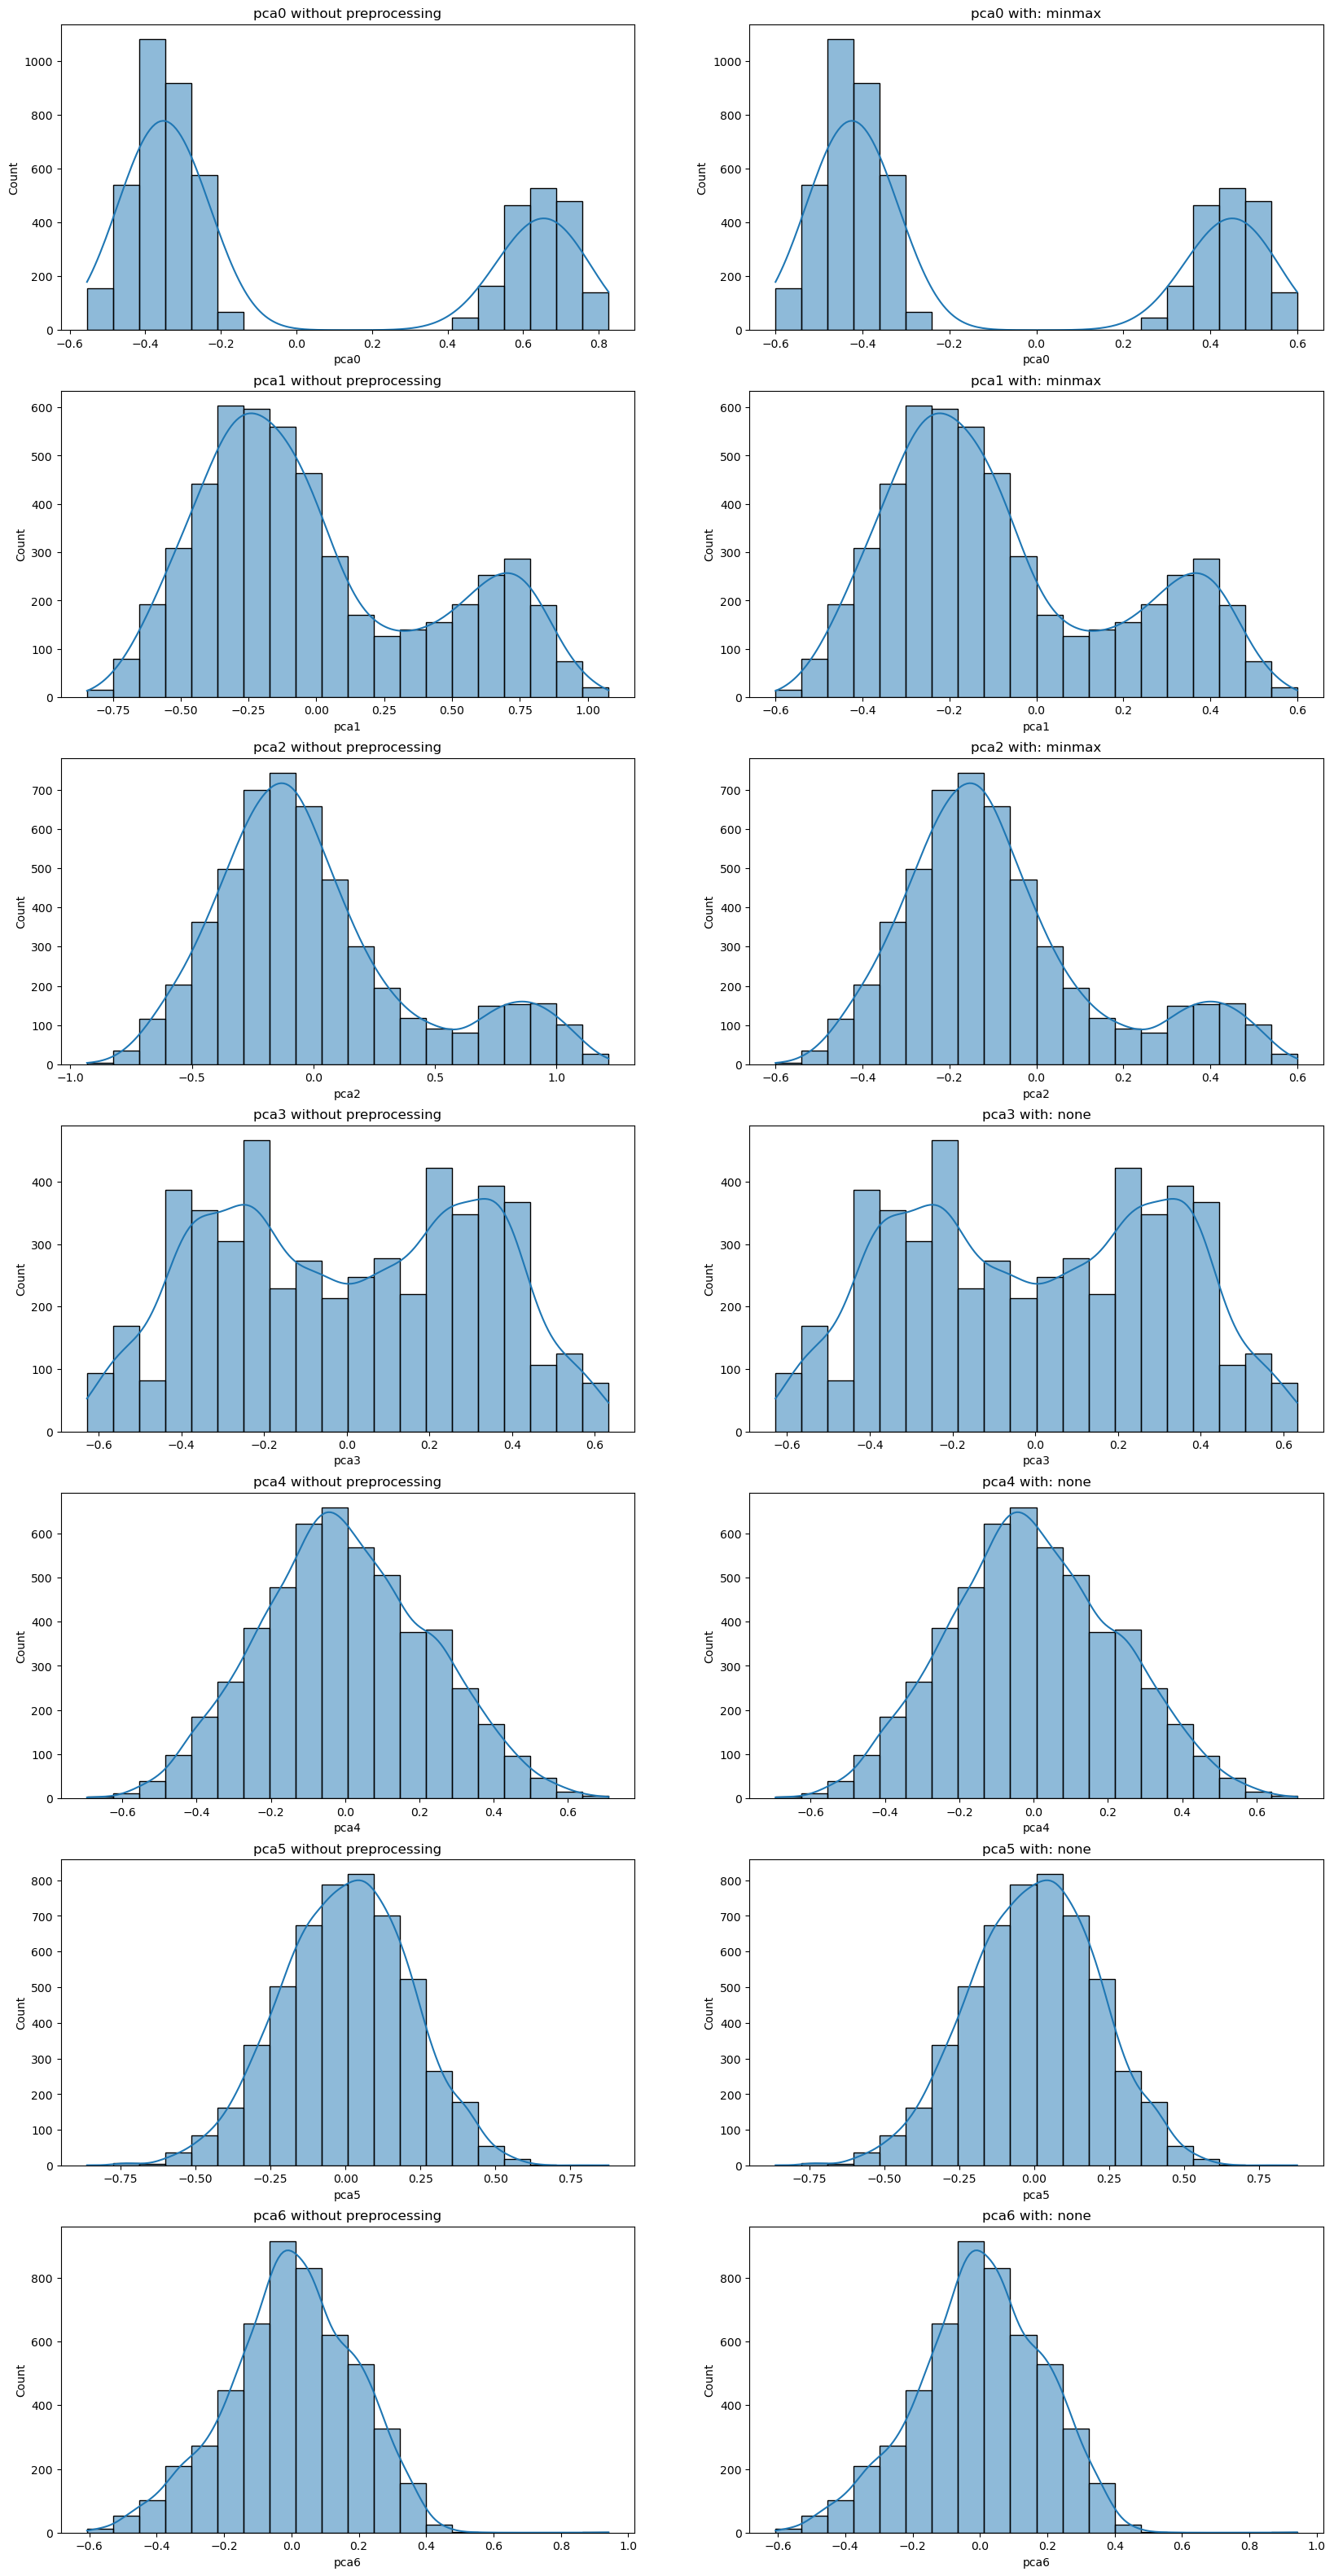

In [149]:
fig, ax = plt.subplots(number_of_components, 2, figsize=(20, 40))

for i in range(ax.shape[0]):
    sns.histplot(data=songs5000_processed_df.iloc[:, i], bins=20, kde=True, ax=ax[i, 0]);
    sns.histplot(data=songs5000_preprocessed2_df.iloc[:, i], bins=20, kde=True, ax=ax[i, 1]);

    ax[i, 0].set_title(f'{list(preprocessing2_dict.keys())[i]} without preprocessing')
    ax[i, 1].set_title(f'{list(preprocessing2_dict.keys())[i]} with: {''', '''.join([method['method'] for method in preprocessing2_dict[list(preprocessing2_dict.keys())[i]]])}')
    
plt.show()

In [150]:
# For loop with a few iterations per each "k"
# Around 0.5 seconds per 1 "k" and per 1 iteration
# A run takes (max_k - min_k) * iterations_per_seed * 0.75 / 60 minutes

# Parameters
seed = 123
min_k = 20
max_k = 130
iterations_per_seed = 50
ch_scores2 = []
db_scores2 = []
inertia_list2 = []
sil_scores2 = []

# Generate x random seeds
random.seed(seed)
random_seeds = [random.randint(0, 10000) for _ in range(iterations_per_seed)]

# Iterations
for k in range(min_k, max_k):
    ch_score_in_iteration = []
    db_score_in_iteration = []
    inertia_in_iteration = []
    sil_score_in_iteration = []
    
    for rnd_seed in random_seeds:
        k_means = KMeans(n_clusters=k, n_init="auto", random_state=rnd_seed)
        k_means.fit(songs5000_preprocessed2_df)
        
        # Calculate Calinski-Harabasz score, Davies-Bouldin score, inertia and silhouette score
        labels = k_means.labels_
        
        ch_score = calinski_harabasz_score(songs5000_preprocessed2_df, labels)
        ch_score_in_iteration.append(ch_score)
        
        db_score = davies_bouldin_score(songs5000_preprocessed2_df, labels)
        db_score_in_iteration.append(db_score)
        
        inertia_in_iteration.append(k_means.inertia_)
        
        sil_score = silhouette_score(songs5000_preprocessed2_df, labels)
        sil_score_in_iteration.append(sil_score)
    
    # Append averages to the final lists
    ch_scores2.append(pd.Series(ch_score_in_iteration).mean())
    db_scores2.append(pd.Series(db_score_in_iteration).mean())
    inertia_list2.append(pd.Series(inertia_in_iteration).mean())
    sil_scores2.append(pd.Series(sil_score_in_iteration).mean())

_ = ctypes.windll.kernel32.Beep(1000, 2000)

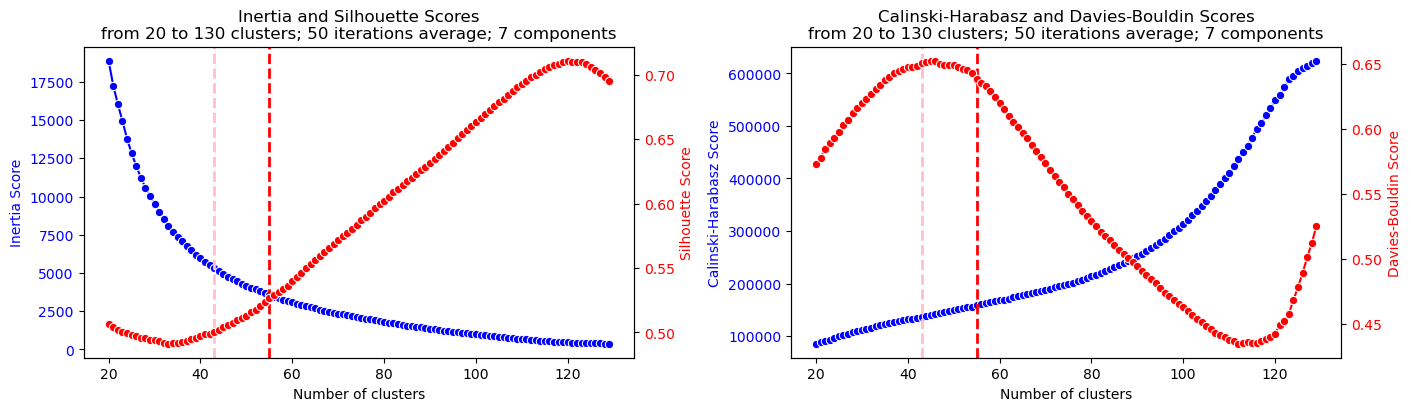

In [151]:
# Assuming inertia_list, sil_scores, ch_scores, db_scores, min_k, and max_k are defined

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 4), constrained_layout=True)

# First subplot: Inertia and Silhouette Scores
ax1 = axes[0]
sns.lineplot(x=range(min_k, max_k), y=inertia_list2, marker='o', ax=ax1, label="Inertia Score", color='b', legend=False)
ax1.set_xlabel("Number of clusters")
ax1.set_ylabel("Inertia Score", color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax1_2 = ax1.twinx()
sns.lineplot(x=range(min_k, max_k), y=sil_scores2, marker='o', ax=ax1_2, label="Silhouette Score", color='r', legend=False)
ax1_2.set_ylabel("Silhouette Score", color='r')
ax1_2.tick_params(axis='y', labelcolor='r')

ax1.set_title(f"Inertia and Silhouette Scores\nfrom {min_k} to {max_k} clusters; {iterations_per_seed} iterations average; {number_of_components} components")
ax1.axvline(x=43, color='pink', linestyle='--', linewidth=2)
ax1.axvline(x=55, color='red', linestyle='--', linewidth=2)

# Second subplot: Calinski-Harabasz and Davies-Bouldin Scores
ax2 = axes[1]
sns.lineplot(x=range(min_k, max_k), y=ch_scores2, marker='o', ax=ax2, label="Calinski-Harabasz Score", color='b', legend=False)
ax2.set_xlabel("Number of clusters")
ax2.set_ylabel("Calinski-Harabasz Score", color='b')
ax2.tick_params(axis='y', labelcolor='b')

ax2_2 = ax2.twinx()
sns.lineplot(x=range(min_k, max_k), y=db_scores2, marker='o', ax=ax2_2, label="Davies-Bouldin Score", color='r', legend=False)
ax2_2.set_ylabel("Davies-Bouldin Score", color='r')
ax2_2.tick_params(axis='y', labelcolor='r')

ax2.set_title(f"Calinski-Harabasz and Davies-Bouldin Scores\nfrom {min_k} to {max_k} clusters; {iterations_per_seed} iterations average; {number_of_components} components")
ax2.axvline(x=43, color='pink', linestyle='--', linewidth=2)
ax2.axvline(x=55, color='red', linestyle='--', linewidth=2)

# Add legends to the figure
# fig.legend(loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=2)

# Show the combined plots
plt.show()

### 4.5.1 Second preprocessing (alternative)

In [152]:
preprocessing2_alt_dict = {
    'pca0': [
        {'method': 'minmax', 'parameters': {'feature_range': (-0.6, 0.6)}}
    ],
    'pca1': [
        {'method': 'minmax', 'parameters': {'feature_range': (-0.6, 0.6)}}
    ],
    'pca2': [
        {'method': 'minmax', 'parameters': {'feature_range': (-0.6, 0.6)}}
    ],
    'pca3': [
        {'method': 'none'}
    ],
    'pca4': [
        {'method': 'none'}
    ],
    'pca5': [
        {'method': 'none'}
    ],
    'pca6': [
        {'method': 'none'}
    ]
}
preprocessing2_alt_df = pd.DataFrame(
    [
        (key, method.get('method'), method.get('parameters', {}))
        for key, methods in preprocessing2_alt_dict.items()
        if isinstance(methods, list)
        for method in methods
        if isinstance(method, dict)
    ],
    columns=["feature", "method", "parameters"]
)
preprocessing2_alt_df

feature  method                      parameters
0    pca0  minmax  {'feature_range': (-0.6, 0.6)}
1    pca1  minmax  {'feature_range': (-0.6, 0.6)}
2    pca2  minmax  {'feature_range': (-0.6, 0.6)}
3    pca3    none                              {}
4    pca4    none                              {}
5    pca5    none                              {}
6    pca6    none                              {}

In [153]:
songs5000_preprocessed2_alt_df = songs5000_processed_alt_df.copy()

for i, row in preprocessing2_df.iterrows():
    feature = row['feature']
    method = row['method']
    parameters = row['parameters']

    if method == 'function':
        scaler = FunctionTransformer(**parameters).set_output(transform="default")
        songs5000_preprocessed2_alt_df[feature] = scaler.fit_transform(songs5000_preprocessed2_alt_df[[feature]])
    elif method == 'minmax':
        scaler = MinMaxScaler(**parameters).set_output(transform="pandas")
        songs5000_preprocessed2_alt_df[feature] = scaler.fit_transform(songs5000_preprocessed2_alt_df[[feature]])
    elif method == 'power':
        transformer = PowerTransformer(**parameters).set_output(transform="pandas")
        songs5000_preprocessed2_alt_df[feature] = transformer.fit_transform(songs5000_preprocessed2_alt_df[[feature]])
    elif method == 'quantile':
        transformer = QuantileTransformer(**parameters).set_output(transform="pandas")
        songs5000_preprocessed2_alt_df[feature] = transformer.fit_transform(songs5000_preprocessed2_alt_df[[feature]])
    elif method == 'robust':
        scaler = RobustScaler(**parameters).set_output(transform="pandas")
        songs5000_preprocessed2_alt_df[feature] = scaler.fit_transform(songs5000_preprocessed2_alt_df[[feature]])
    elif method == 'standard':
        scaler = StandardScaler(**parameters).set_output(transform="pandas")
        songs5000_preprocessed2_alt_df[feature] = scaler.fit_transform(songs5000_preprocessed2_alt_df[[feature]])

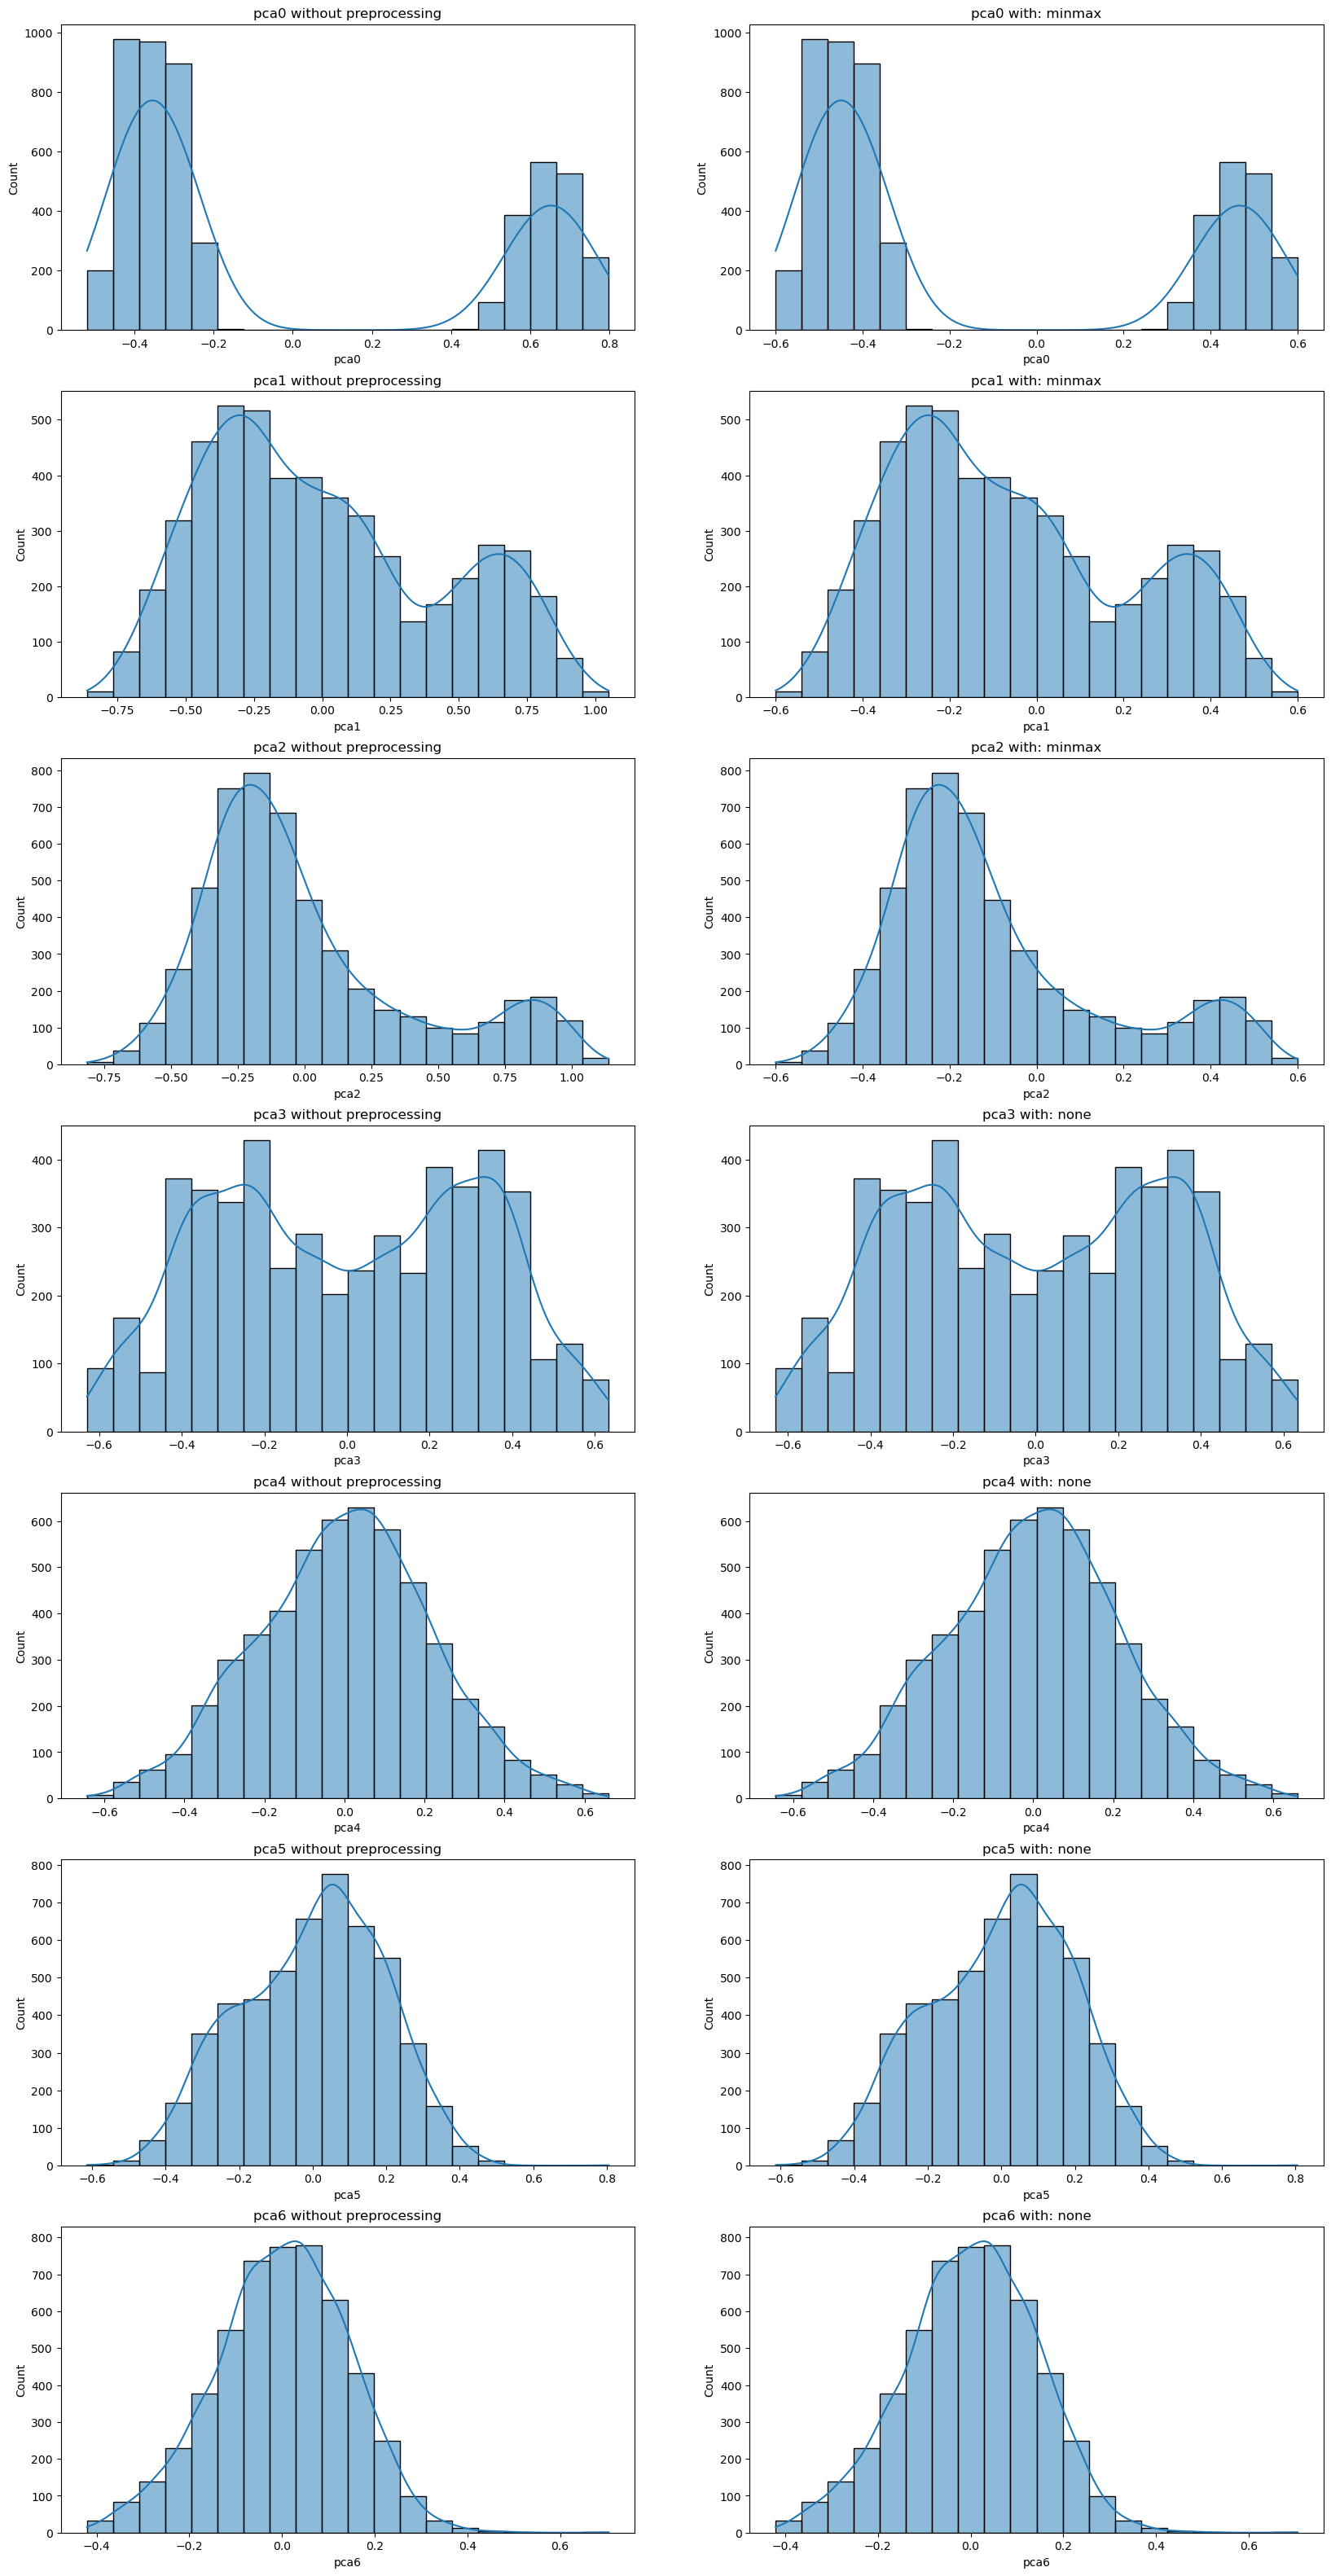

In [154]:
fig, ax = plt.subplots(number_of_components, 2, figsize=(20, 40))

for i in range(ax.shape[0]):
    sns.histplot(data=songs5000_processed_alt_df.iloc[:, i], bins=20, kde=True, ax=ax[i, 0]);
    sns.histplot(data=songs5000_preprocessed2_alt_df.iloc[:, i], bins=20, kde=True, ax=ax[i, 1]);

    ax[i, 0].set_title(f'{list(preprocessing2_alt_dict.keys())[i]} without preprocessing')
    ax[i, 1].set_title(f'{list(preprocessing2_alt_dict.keys())[i]} with: {''', '''.join([method['method'] for method in preprocessing2_alt_dict[list(preprocessing2_alt_dict.keys())[i]]])}')
    
plt.show()

In [155]:
# For loop with a few iterations per each "k"
# Around 0.5 seconds per 1 "k" and per 1 iteration
# A run takes (max_k - min_k) * iterations_per_seed * 0.75 / 60 minutes

# Parameters
seed = 123
min_k = 20
max_k = 130
iterations_per_seed = 50
ch_scores2_alt = []
db_scores2_alt = []
inertia_list2_alt = []
sil_scores2_alt = []

# Generate 10 random seeds
random.seed(seed)
random_seeds = [random.randint(0, 10000) for _ in range(iterations_per_seed)]

# Iterations
for k in range(min_k, max_k):
    ch_score_in_iteration = []
    db_score_in_iteration = []
    inertia_in_iteration = []
    sil_score_in_iteration = []
    
    for rnd_seed in random_seeds:
        k_means = KMeans(n_clusters=k, n_init="auto", random_state=rnd_seed)
        k_means.fit(songs5000_preprocessed2_alt_df)
        
        # Calculate Calinski-Harabasz score, Davies-Bouldin score, inertia and silhouette score
        labels = k_means.labels_
        
        ch_score = calinski_harabasz_score(songs5000_preprocessed2_alt_df, labels)
        ch_score_in_iteration.append(ch_score)
        
        db_score = davies_bouldin_score(songs5000_preprocessed2_alt_df, labels)
        db_score_in_iteration.append(db_score)
        
        inertia_in_iteration.append(k_means.inertia_)
        
        sil_score = silhouette_score(songs5000_preprocessed2_alt_df, labels)
        sil_score_in_iteration.append(sil_score)
    
    # Append averages to the final lists
    ch_scores2_alt.append(pd.Series(ch_score_in_iteration).mean())
    db_scores2_alt.append(pd.Series(db_score_in_iteration).mean())
    inertia_list2_alt.append(pd.Series(inertia_in_iteration).mean())
    sil_scores2_alt.append(pd.Series(sil_score_in_iteration).mean())

_ = ctypes.windll.kernel32.Beep(1000, 2000)

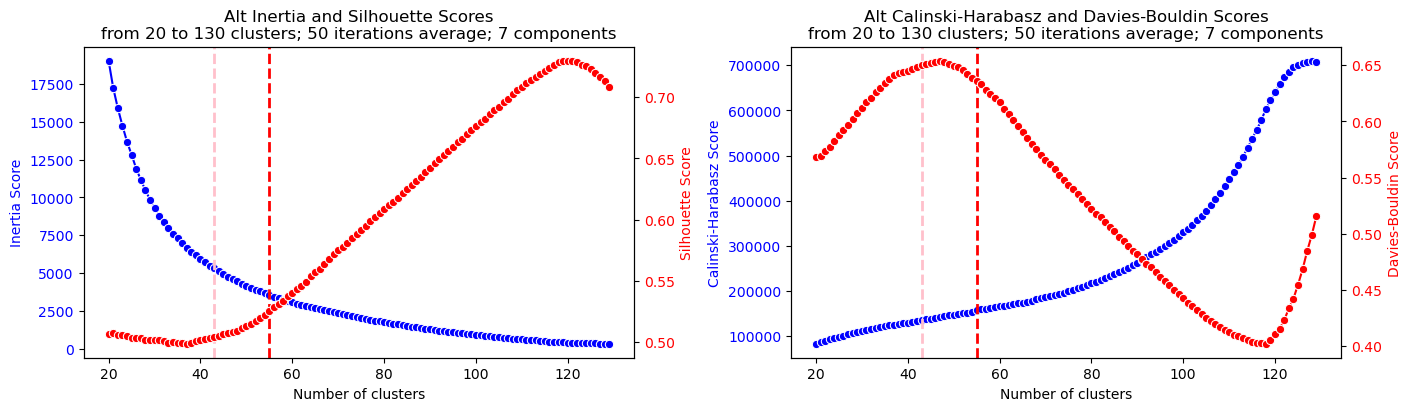

In [156]:
# Assuming inertia_list, sil_scores, ch_scores, db_scores, min_k, and max_k are defined

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 4), constrained_layout=True)

# First subplot: Inertia and Silhouette Scores
ax1 = axes[0]
sns.lineplot(x=range(min_k, max_k), y=inertia_list2_alt, marker='o', ax=ax1, label="Inertia Score", color='b', legend=False)
ax1.set_xlabel("Number of clusters")
ax1.set_ylabel("Inertia Score", color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax1_2 = ax1.twinx()
sns.lineplot(x=range(min_k, max_k), y=sil_scores2_alt, marker='o', ax=ax1_2, label="Silhouette Score", color='r', legend=False)
ax1_2.set_ylabel("Silhouette Score", color='r')
ax1_2.tick_params(axis='y', labelcolor='r')

ax1.set_title(f"Alt Inertia and Silhouette Scores\nfrom {min_k} to {max_k} clusters; {iterations_per_seed} iterations average; {number_of_components} components")
ax1.axvline(x=43, color='pink', linestyle='--', linewidth=2)
ax1.axvline(x=55, color='red', linestyle='--', linewidth=2)

# Second subplot: Calinski-Harabasz and Davies-Bouldin Scores
ax2 = axes[1]
sns.lineplot(x=range(min_k, max_k), y=ch_scores2_alt, marker='o', ax=ax2, label="Calinski-Harabasz Score", color='b', legend=False)
ax2.set_xlabel("Number of clusters")
ax2.set_ylabel("Calinski-Harabasz Score", color='b')
ax2.tick_params(axis='y', labelcolor='b')

ax2_2 = ax2.twinx()
sns.lineplot(x=range(min_k, max_k), y=db_scores2_alt, marker='o', ax=ax2_2, label="Davies-Bouldin Score", color='r', legend=False)
ax2_2.set_ylabel("Davies-Bouldin Score", color='r')
ax2_2.tick_params(axis='y', labelcolor='r')

ax2.set_title(f"Alt Calinski-Harabasz and Davies-Bouldin Scores\nfrom {min_k} to {max_k} clusters; {iterations_per_seed} iterations average; {number_of_components} components")
ax2.axvline(x=43, color='pink', linestyle='--', linewidth=2)
ax2.axvline(x=55, color='red', linestyle='--', linewidth=2)

# Add legends to the figure
# fig.legend(loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=2)

# Show the combined plots
plt.show()

65 for 5 principal components

84 for 3 principal components

In [157]:
number_of_kmeans2 = 55
number_of_kmeans2_alt = 55

## 4.6 k-means clustering

In [158]:
kmeans2 = KMeans(n_clusters = number_of_kmeans2, random_state = 123)
kmeans2.fit(songs5000_preprocessed2_df)
clusters = kmeans2.labels_
songs5000_preprocessed2_df["cluster"] = clusters
# songs5000_preprocessed2_df

In [159]:
songs5000_preprocessed2_df.groupby(by="cluster").mean().mean()

pca0   -0.086765
pca1   -0.085657
pca2   -0.087929
pca3   -0.000045
pca4    0.007059
pca5    0.000249
pca6   -0.004017
dtype: float64

### 4.6.1 k-means clustering (alternative)

In [160]:
kmeans2_alt = KMeans(n_clusters = number_of_kmeans2_alt, random_state = 123)
kmeans2_alt.fit(songs5000_preprocessed2_alt_df)
clusters = kmeans2_alt.labels_
songs5000_preprocessed2_alt_df["cluster"] = clusters
# songs5000_preprocessed2_alt_df

In [161]:
songs5000_preprocessed2_alt_df.groupby(by="cluster").mean().mean()

pca0   -0.082494
pca1   -0.067121
pca2   -0.109357
pca3   -0.000672
pca4    0.008422
pca5    0.000112
pca6    0.000886
dtype: float64

In [192]:
songs5000_pca2 = PCA()
songs5000_pca2_df = songs5000_pca2.fit_transform(songs5000_preprocessed2_df)
# songs5000_pca_df

In [193]:
songs5000_pca2_alt = PCA()
songs5000_pca2_alt_df = songs5000_pca2_alt.fit_transform(songs5000_preprocessed2_alt_df)
# songs5000_pca_df

In [194]:
print('Explained variance by pricipal component:\n', songs5000_pca2.explained_variance_ratio_)
print('\nCummulative explained variance by principal component\n', np.cumsum(songs5000_pca2.explained_variance_ratio_))

Explained variance by pricipal component:
 [9.97647508e-01 7.76011310e-04 4.33098490e-04 3.21771882e-04
 2.37696264e-04 2.27087070e-04 2.00798866e-04 1.56028170e-04]

Cummulative explained variance by principal component
 [0.99764751 0.99842352 0.99885662 0.99917839 0.99941609 0.99964317
 0.99984397 1.        ]


In [195]:
print('Explained variance by pricipal component:\n', songs5000_pca2_alt.explained_variance_ratio_)
print('\nCummulative explained variance by principal component\n', np.cumsum(songs5000_pca2_alt.explained_variance_ratio_))

Explained variance by pricipal component:
 [9.97853481e-01 7.72041413e-04 4.06721953e-04 2.95401335e-04
 2.44951224e-04 1.91254046e-04 1.52931083e-04 8.32183414e-05]

Cummulative explained variance by principal component
 [0.99785348 0.99862552 0.99903224 0.99932765 0.9995726  0.99976385
 0.99991678 1.        ]


## 4.7 Radar chart

In [167]:
scatter_objects = []
categories = songs5000_preprocessed2_df.drop(columns=['cluster']).columns

# Iterate over the unique clusters and add an object for each cluster to the list
for cluster in sorted(songs5000_preprocessed2_df['cluster'].unique()):

  # Find the mean value for each column of the cluster
  cluster_means = [songs5000_preprocessed2_df.loc[songs5000_preprocessed2_df["cluster"] == cluster, category].mean() for category in categories]
  cluster_scatter = go.Scatterpolar(r = cluster_means, theta = categories, fill = 'toself', name = f'Cluster {cluster}')
  scatter_objects.append(cluster_scatter)

# Create the figure (the white area)
fig = go.Figure()
fig.add_traces(scatter_objects)

# Add extras to the plot, such as title
fig.update_layout(
  title_text = 'Radar chart of MEAN by cluster',
  height = 600,
  width = 800,
  polar = dict(radialaxis = dict(visible = True, range = [0, 1])),
  showlegend = True
)

fig.show()

In [168]:
scatter_objects = []
categories = songs5000_preprocessed2_alt_df.drop(columns=['cluster']).columns

# Iterate over the unique clusters and add an object for each cluster to the list
for cluster in sorted(songs5000_preprocessed2_alt_df['cluster'].unique()):

  # Find the mean value for each column of the cluster
  cluster_means = [songs5000_preprocessed2_alt_df.loc[songs5000_preprocessed2_alt_df["cluster"] == cluster, category].mean() for category in categories]
  cluster_scatter = go.Scatterpolar(r = cluster_means, theta = categories, fill = 'toself', name = f'Cluster {cluster}')
  scatter_objects.append(cluster_scatter)

# Create the figure (the white area)
fig = go.Figure()
fig.add_traces(scatter_objects)

# Add extras to the plot, such as title
fig.update_layout(
  title_text = 'Alt Radar chart of MEAN by cluster',
  height = 600,
  width = 800,
  polar = dict(radialaxis = dict(visible = True, range = [0, 1])),
  showlegend = True
)

fig.show()

## 4.8 Clusters 3D plot

In [205]:
songs5000_preprocessed2_chart_df = songs5000_preprocessed2_df.loc[songs5000_preprocessed2_df['cluster'].isin(random.sample(list(songs5000_preprocessed2_df['cluster'].values), 100))].copy()
# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=songs5000_preprocessed2_chart_df.iloc[:, 0],  # X-axis
    y=songs5000_preprocessed2_chart_df.iloc[:, 1],  # Y-axis
    z=songs5000_preprocessed2_chart_df.iloc[:, 2],  # Z-axis
    mode='markers',  # Show data points as markers
    marker=dict(
        color=songs5000_preprocessed2_chart_df.loc[:, 'cluster'],  # Color by KMeans labels
        colorscale='turbo',  # Use the 'Viridis' color scale
        size=2,  # Marker size
        opacity=0.8  # Marker opacity
    )
)])

# Update layout with axis labels and title
fig.update_layout(
    title='KMeans Clustering in 3D',
    scene=dict(
        xaxis_title=songs5000_preprocessed2_chart_df.columns[0],  # Label for X-axis
        yaxis_title=songs5000_preprocessed2_chart_df.columns[1],  # Label for Y-axis
        zaxis_title=songs5000_preprocessed2_chart_df.columns[2]   # Label for Z-axis
    ),
    margin=dict(l=0, r=0, b=0, t=40),  # Adjust the margins as needed
    width = 900,
    height = 800
)

# Show the plot
fig.show()


In [206]:
songs5000_preprocessed2_alt_chart_df = songs5000_preprocessed2_alt_df.loc[songs5000_preprocessed2_alt_df['cluster'].isin(random.sample(list(songs5000_preprocessed2_alt_df['cluster'].values), 100))].copy()
# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=songs5000_preprocessed2_alt_chart_df.iloc[:, 0],  # X-axis
    y=songs5000_preprocessed2_alt_chart_df.iloc[:, 1],  # Y-axis
    z=songs5000_preprocessed2_alt_chart_df.iloc[:, 2],  # Z-axis
    mode='markers',  # Show data points as markers
    marker=dict(
        color=songs5000_preprocessed2_alt_chart_df.loc[:, 'cluster'],  # Color by KMeans labels
        colorscale='turbo',  # Use the 'Viridis' color scale
        size=2,  # Marker size
        opacity=0.8  # Marker opacity
    )
)])

# Update layout with axis labels and title
fig.update_layout(
    title='KMeans Clustering in 3D',
    scene=dict(
        xaxis_title=songs5000_preprocessed2_alt_chart_df.columns[0],  # Label for X-axis
        yaxis_title=songs5000_preprocessed2_alt_chart_df.columns[1],  # Label for Y-axis
        zaxis_title=songs5000_preprocessed2_alt_chart_df.columns[2]   # Label for Z-axis
    ),
    margin=dict(l=0, r=0, b=0, t=40),  # Adjust the margins as needed
    width = 900,
    height = 800
)

# Show the plot
fig.show()


## 4.9 Songs

In [198]:
pd.set_option('display.max_colwidth', None)

In [199]:
songs5000_preprocessed2_final_df = songs5000_preprocessed2_df.sort_values(by="cluster").join(songs5000_names_df) # .drop(columns=['html'])
pd.DataFrame(songs5000_preprocessed2_final_df.groupby('cluster').size().rename('tracks')).sort_values('tracks').reset_index()

cluster  tracks
0        53      27
1        26      29
2        51      41
3        43      43
4        54      46
5        45      49
6        31      60
7        12      61
8        41      64
9         6      66
10       17      67
11       44      68
12        0      68
13       50      69
14       21      70
15        2      72
16       11      73
17       49      74
18       29      75
19       40      79
20       13      79
21       42      82
22       30      85
23       15      86
24       46      87
25       24      87
26       48      88
27        8      88
28       38      91
29       22      92
30        7      92
31       33      94
32        1     102
33       25     103
34       10     105
35       36     108
36       52     110
37       16     110
38        5     110
39        9     111
40        3     113
41       34     114
42       20     119
43       18     120
44       47     121
45       32     126
46       39     129
47       19     130
48       27     132
49       37     138
50       35     142
51       28     143
52       23     153
53        4     176
54       14     193

In [200]:
songs5000_preprocessed2_final_df.loc[songs5000_preprocessed2_final_df['cluster'] == 0, ['cluster', 'artist', 'name', 'html']]

cluster  \
id                                 
6SKwQghsR8AISlxhcwyA9R         0   
5RjS5iW0FWn1U4ZaWjhLlP         0   
7JFoeg0arawADjGcz9gBnq         0   
0HKD13PLq2WicViBBhSrOl         0   
3CBoWhq9cd7WGQZ9EDQVnn         0   
...                          ...   
5H4fXPTFSpkNWsFT6RrmYY         0   
55S2PQgSMYAhgoTCcGCDfw         0   
3FeVmId7tL5YN8B7R3imoM         0   
0fg4G8O1iE8rE7jpNpkhMX         0   
2bZYJvVRN5EqIvAUFhUNls         0   

                                                                   artist  \
id                                                                          
6SKwQghsR8AISlxhcwyA9R   Bruno Mars                                         
5RjS5iW0FWn1U4ZaWjhLlP   Tasha Cobbs Leonard                                
7JFoeg0arawADjGcz9gBnq   The Boomtown Rats                                  
0HKD13PLq2WicViBBhSrOl   Gabrielle                                          
3CBoWhq9cd7WGQZ9EDQVnn   Five Finger Death Punch                            
...                                                                   ...   
5H4fXPTFSpkNWsFT6RrmYY   Cedric Gervais                                     
55S2PQgSMYAhgoTCcGCDfw   5 Seconds of Summer                                
3FeVmId7tL5YN8B7R3imoM   Coldplay                                           
0fg4G8O1iE8rE7jpNpkhMX   Edge Of Sanity                                     
2bZYJvVRN5EqIvAUFhUNls   R3HAB                                              

                                                                                                                                                                                                      name  \
id                                                                                                                                                                                                           
6SKwQghsR8AISlxhcwyA9R   Marry You                                                                                                                                                                           
5RjS5iW0FWn1U4ZaWjhLlP   I'm Getting Ready                                                                                                                                                                   
7JFoeg0arawADjGcz9gBnq   I Don't Like Mondays                                                                                                                                                                
0HKD13PLq2WicViBBhSrOl   Out Of Reach                                                                                                                                                                        
3CBoWhq9cd7WGQZ9EDQVnn   Under and Over It                                                                                                                                                                   
...                                                                                                                                                                                                    ...   
5H4fXPTFSpkNWsFT6RrmYY   Molly                                                                                                                                                                               
55S2PQgSMYAhgoTCcGCDfw   Youngblood                                                                                                                                                                          
3FeVmId7tL5YN8B7R3imoM   My Universe                                                                                                                                                                         
0fg4G8O1iE8rE7jpNpkhMX   Blood of My Enemies                                                                                                                                                                 
2bZYJvVRN5EqIvAUFhUNls   Flames (with ZAYN) - R3HAB & Skytech VIP Remix           

In [201]:
songs5000_preprocessed2_alt_final_df = songs5000_preprocessed2_alt_df.sort_values(by="cluster").join(songs5000_names_df) # .drop(columns=['html'])
pd.DataFrame(songs5000_preprocessed2_alt_final_df.groupby('cluster').size().rename('tracks')).sort_values('tracks').reset_index()

cluster  tracks
0        30      34
1        25      39
2        40      41
3         7      42
4        21      47
5         0      63
6        52      63
7        50      64
8        31      67
9        20      68
10       51      69
11       13      69
12        6      70
13       53      71
14       33      72
15       43      75
16       37      76
17       42      78
18       19      78
19       54      78
20       44      80
21       46      81
22       41      84
23        9      85
24       48      86
25       23      86
26       38      86
27       47      87
28        4      89
29       18      89
30       27      92
31       28      92
32       49      93
33       34      93
34       45      97
35       12      98
36       15      99
37       39     100
38       35     101
39       14     105
40       17     108
41        3     109
42       24     109
43        5     111
44       10     122
45       36     130
46       22     134
47        1     136
48       11     137
49       26     144
50       32     150
51       29     153
52        2     158
53       16     175
54        8     197

In [202]:
songs5000_preprocessed2_alt_final_df.loc[songs5000_preprocessed2_alt_final_df['cluster'] == 2, ['cluster', 'artist', 'name', 'html']]

cluster  \
id                                 
6a06vmzIppjBTTdVrx8t5D         2   
7cCJNG7JhYMsBiiPiynEty         2   
3GfDVDXAs3sxsnfYJ2MG9z         2   
3xjaaBf7ef5TWermNspKOM         2   
477naywDON3t1iAF4COlOV         2   
...                          ...   
0AA6zq5ArZ1sSH7VIMi4NK         2   
6Tsu3OsuMz4KEGKbOYd6A0         2   
7mUR9hqvGLG5XicfVl7gTm         2   
3dgQqOiQ9fCKVhNOedd2lf         2   
5ByAIlEEnxYdvpnezg7HTX         2   

                                                                   artist  \
id                                                                          
6a06vmzIppjBTTdVrx8t5D   Jon Hopkins                                        
7cCJNG7JhYMsBiiPiynEty   David Guetta                                       
3GfDVDXAs3sxsnfYJ2MG9z   Olga Scheps                                        
3xjaaBf7ef5TWermNspKOM   Eydís Evensen                                      
477naywDON3t1iAF4COlOV   Stars Of The Lid                                   
...                                                                   ...   
0AA6zq5ArZ1sSH7VIMi4NK   MiMS                                               
6Tsu3OsuMz4KEGKbOYd6A0   The Notorious B.I.G.                               
7mUR9hqvGLG5XicfVl7gTm   Richard Strauss                                    
3dgQqOiQ9fCKVhNOedd2lf   Drake                                              
5ByAIlEEnxYdvpnezg7HTX   The Notorious B.I.G.                               

                                                                                                                                                                                                      name  \
id                                                                                                                                                                                                           
6a06vmzIppjBTTdVrx8t5D   Dawn Chorus                                                                                                                                                                         
7cCJNG7JhYMsBiiPiynEty   Hey Mama (feat. Nicki Minaj & Afrojack)                                                                                                                                             
3GfDVDXAs3sxsnfYJ2MG9z   Armellodie                                                                                                                                                                          
3xjaaBf7ef5TWermNspKOM   Bylur                                                                                                                                                                               
477naywDON3t1iAF4COlOV   Don't Bother They're Here                                                                                                                                                           
...                                                                                                                                                                                                    ...   
0AA6zq5ArZ1sSH7VIMi4NK   This Is Why I'm Hot                                                                                                                                                                 
6Tsu3OsuMz4KEGKbOYd6A0   Hypnotize - 2007 Remaster                                                                                                                                                           
7mUR9hqvGLG5XicfVl7gTm     Vier letzte Lieder, TrV 296: 2. September                                                                                                                                         
3dgQqOiQ9fCKVhNOedd2lf   Started From the Bottom                                                                                                                                                             
5ByAIlEEnxYdvpnezg7HTX   Juicy - 2005 Remaster                                    

In [203]:
_ = ctypes.windll.kernel32.Beep(1000, 5000)
pd.reset_option('display.max_colwidth')